In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
#import pywt
import matplotlib.patches as patches

In [3]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/agregado-adhoc_2023_micasa/TV,notebook,celular')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/agregado-adhoc_2023_micasa/TV,notebook,celular/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
for i in sorted(glob.glob(path)):
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #sorted(my_list)
  agregado_ad=pd.concat(my_list,join="inner", ignore_index=True)
  agregado_ad

['/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/agregado-adhoc_2023_micasa/TV,notebook,celular']
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/agregado-adhoc_2023_micasa/TV,notebook,celular/domiciliario4corrientes_13_00.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/agregado-adhoc_2023_micasa/TV,notebook,celular/domiciliario4corrientes_13_01.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/agregado-adhoc_2023_micasa/TV,notebook,celular/domiciliario4corrientes_13_02.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/agregado-adhoc_2023_micasa/TV,notebook,celular/domiciliario4corrientes_13_03.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/agregado-adhoc_2023_micasa/TV,notebook,celular/domiciliario4corrientes_13_04.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - docto

In [4]:
agregado_ad.to_csv(r"/content/dataset5\dataset_n5.csv", index=False)

In [5]:
import os          ###Cantidad de archivos en el directorio raíz.
initial_count = 0
dir = "/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/agregado-adhoc_2023_micasa/TV,notebook,celular"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

78


In [6]:
lst = list(range(0,2560*initial_count,2560))
print(lst)

[0, 2560, 5120, 7680, 10240, 12800, 15360, 17920, 20480, 23040, 25600, 28160, 30720, 33280, 35840, 38400, 40960, 43520, 46080, 48640, 51200, 53760, 56320, 58880, 61440, 64000, 66560, 69120, 71680, 74240, 76800, 79360, 81920, 84480, 87040, 89600, 92160, 94720, 97280, 99840, 102400, 104960, 107520, 110080, 112640, 115200, 117760, 120320, 122880, 125440, 128000, 130560, 133120, 135680, 138240, 140800, 143360, 145920, 148480, 151040, 153600, 156160, 158720, 161280, 163840, 166400, 168960, 171520, 174080, 176640, 179200, 181760, 184320, 186880, 189440, 192000, 194560, 197120]


In [7]:
windows_agregado_ad=[]

for i in lst:
  df_i=agregado_ad.iloc[i:i+2560,:]
  windows_agregado_ad.append(df_i)

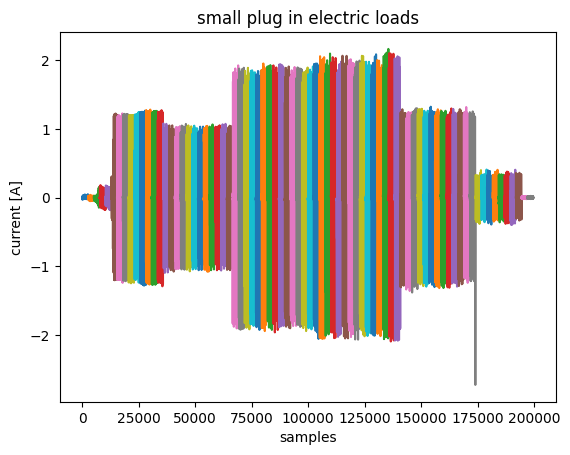

In [8]:
#plt.figure(figsize=(20,10))
i=0
while i<len(windows_agregado_ad):
  pf=windows_agregado_ad[i]
  A=pf['AIValor[Amperios]']
  plt.plot(A)



#plt.show()
  i=i+1

#ax = plt.gca()

#rect = patches.Rectangle((20300,-11),
#                 2577,
  #3               22,
#                 linewidth=3,
 #                edgecolor='blue',
  #               fill = False)

#ax.add_patch(rect)

plt.title('small plug in electric loads')

plt.xlabel('samples')
plt.ylabel('current [A]')


plt.savefig('small_plug_in_electric_loads')

plt.show()

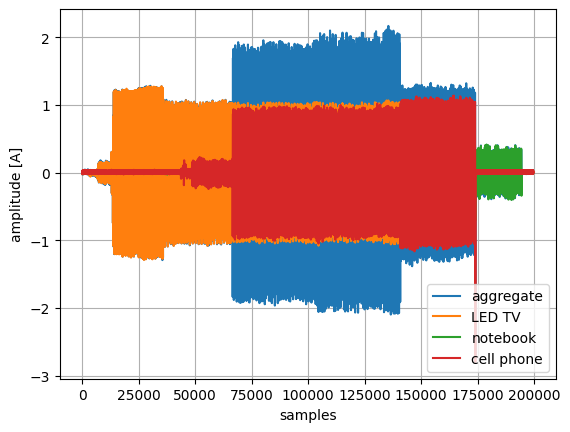

In [9]:
#plt.plot(df_U_I_concat_f_onda_casa2.index, df_U_I_concat_f_onda_casa2['AVValor[Voltios]'])   ##corriente total
#plt.figure(figsize=(20,10))
plt.plot(agregado_ad.index, agregado_ad['AIValor[Amperios]'],label='aggregate')   ##corriente total
plt.plot(agregado_ad.index, agregado_ad['BIValor[Amperios]'],label='LED TV')
plt.plot(agregado_ad.index, agregado_ad['CIValor[Amperios]'],label='notebook')
plt.plot(agregado_ad.index, agregado_ad['DIValor[Amperios]'],label='cell phone')

#leg = plt.legend(loc="upper right", fontsize=15)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)

plt.legend(loc='lower right')

#plt.rc('legend')

plt.xlabel('samples')
plt.ylabel('amplitude [A]')


#plt.title("synchronous currents signals at 2560 samples/s",
       #   fontdict={'family': 'serif',
        #            'color' : 'black',
         #           'weight': 'bold',
          #          'size': 25})

plt.grid(True)

#plt.savefig('ds4.png')
plt.savefig('ds5', bbox_inches='tight')

plt.show()

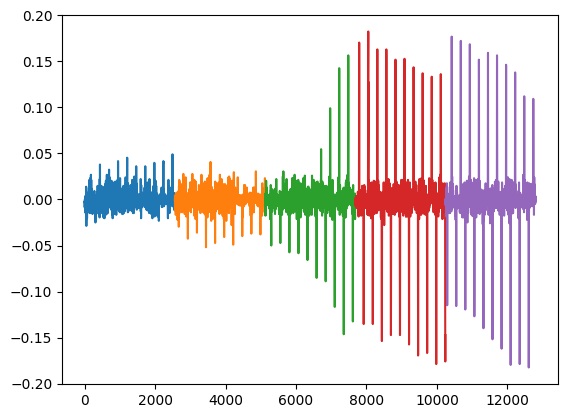

In [10]:
plt.plot(windows_agregado_ad[0]['AIValor[Amperios]'])
plt.plot(windows_agregado_ad[1]['AIValor[Amperios]'])
plt.plot(windows_agregado_ad[2]['AIValor[Amperios]'])
plt.plot(windows_agregado_ad[3]['AIValor[Amperios]'])
plt.plot(windows_agregado_ad[4]['AIValor[Amperios]'])

In [11]:
RMS=[]
i=0
while i<len(windows_agregado_ad):
  y=windows_agregado_ad[i]['DIValor[Amperios]']

  q=np.sqrt(np.mean(y**2))
  RMS.append(q)

  i=i+1

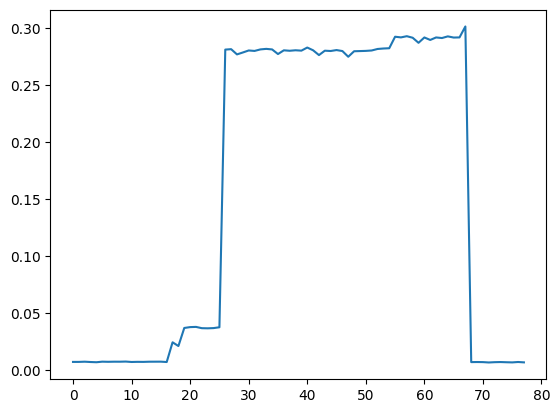

In [12]:
plt.plot(RMS)
#plt.savefig('notebook_rms_')

In [13]:
len(RMS)

78

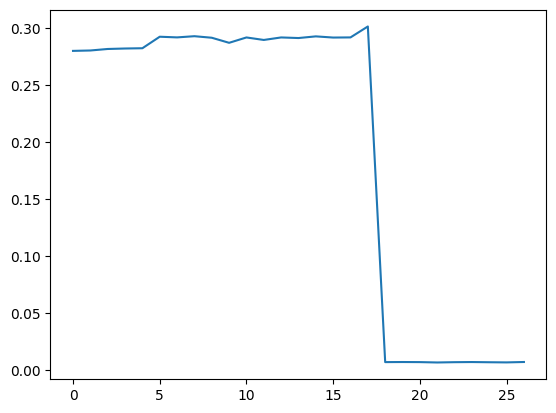

In [14]:
plt.plot(RMS[50:77])

In [15]:
len(RMS[50:77])

27

# H_A

In [17]:
# construct a time signal
Fs= 8000 #sampling signal
tstep=1 / Fs #sample time interval
f0=50 #signal freq

N= int(10*Fs/f0)


t=np.linspace(0, (N-1)*tstep, N)
fstep= Fs/N
f=np.linspace(0, (N-1)*fstep, N)

y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)

In [18]:
fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_A=[]

i=0
while i<len(windows_agregado_ad):





#while i<len(windows)/2:
  pf1=windows_agregado_ad[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['AIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_A.append(H_A_30)
#plot
  #plt.figure(figsize = (12, 6))
 # fig, [ax1, ax2]=plt.subplots(nrows=2, ncols=1)



  #ax1.plot(y, '.-')
  #plt.subplot(121)

  #plt.plot(y)

  #plt.subplot(122)
  #plt.plot(f_plot, X_mag_plot)
  #ax1.set_xlabel('time (s')
  #ax2.set_xlabel('freq (Hz)')

  #plt.show()

  i=i+1

# H_B

In [19]:
fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_B=[]

i=0
while i<len(windows_agregado_ad):





#while i<len(windows)/2:
  pf1=windows_agregado_ad[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['BIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_B.append(H_A_30)
#plot
  #plt.figure(figsize = (12, 6))
 # fig, [ax1, ax2]=plt.subplots(nrows=2, ncols=1)



  #ax1.plot(y, '.-')
  #plt.subplot(121)

  #plt.plot(y)

  #plt.subplot(122)
  #plt.plot(f_plot, X_mag_plot)
  #ax1.set_xlabel('time (s')
  #ax2.set_xlabel('freq (Hz)')

  #plt.show()

  i=i+1

# H_C

frame 0


<Figure size 1200x600 with 0 Axes>

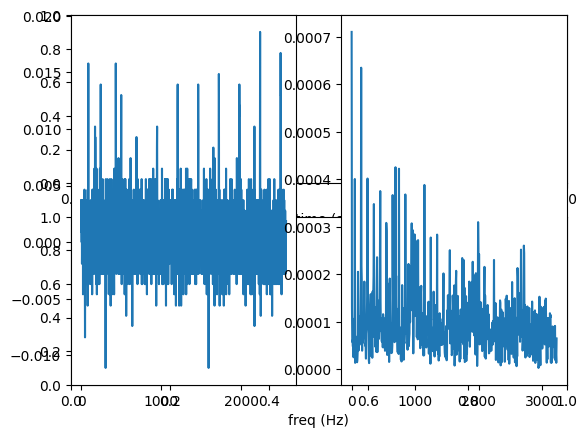

frame 1


<Figure size 1200x600 with 0 Axes>

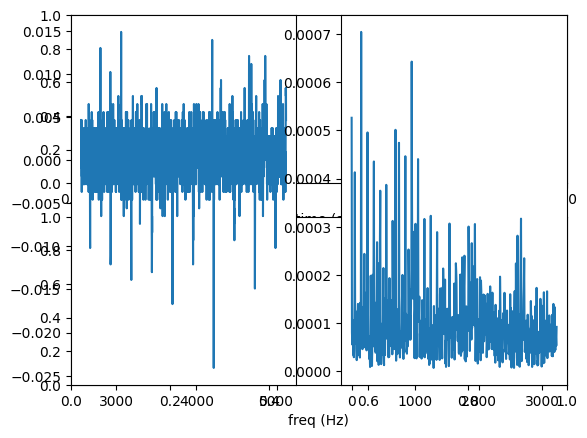

frame 2


<Figure size 1200x600 with 0 Axes>

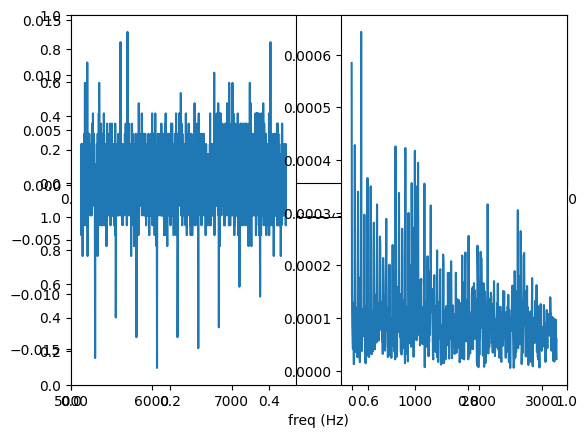

frame 3


<Figure size 1200x600 with 0 Axes>

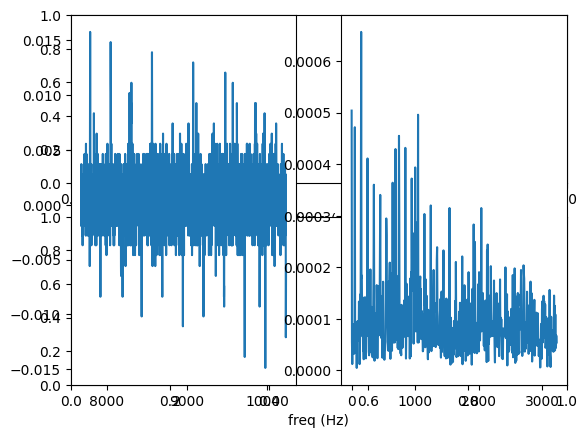

frame 4


<Figure size 1200x600 with 0 Axes>

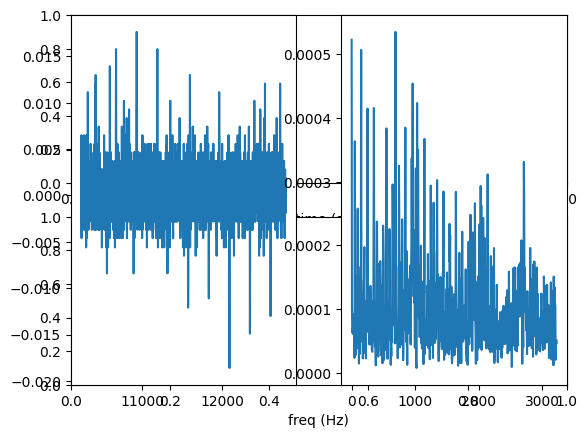

frame 5


<Figure size 1200x600 with 0 Axes>

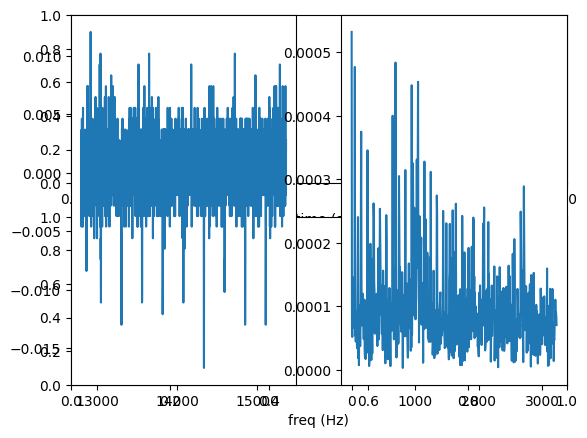

frame 6


<Figure size 1200x600 with 0 Axes>

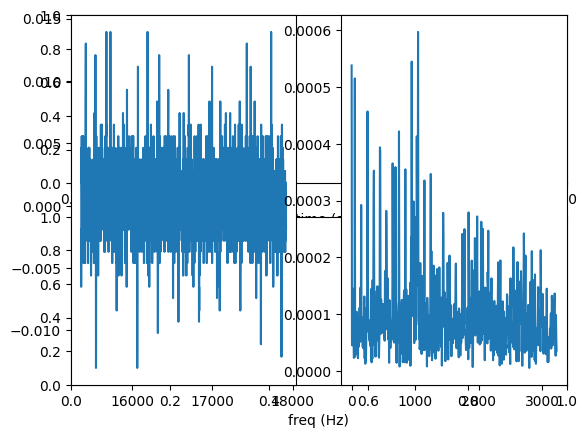

frame 7


<Figure size 1200x600 with 0 Axes>

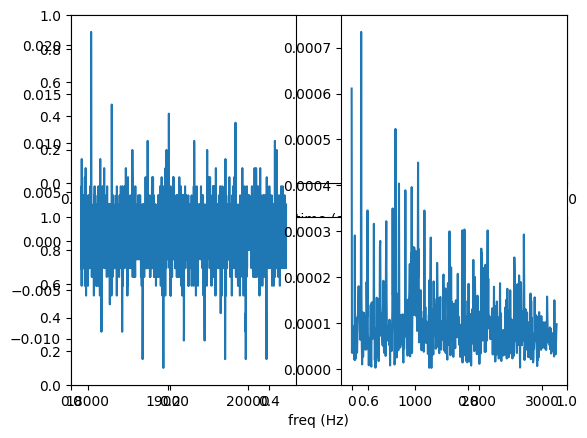

frame 8


<Figure size 1200x600 with 0 Axes>

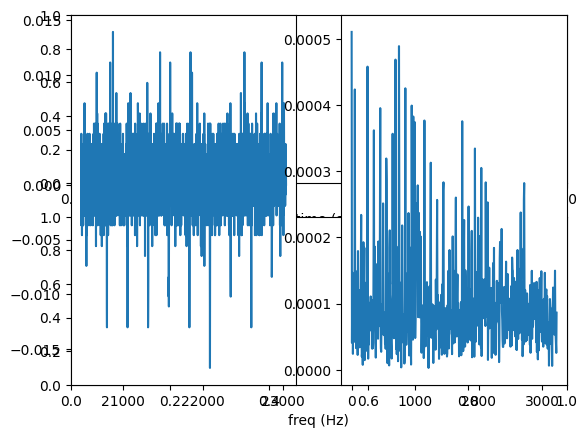

frame 9


<Figure size 1200x600 with 0 Axes>

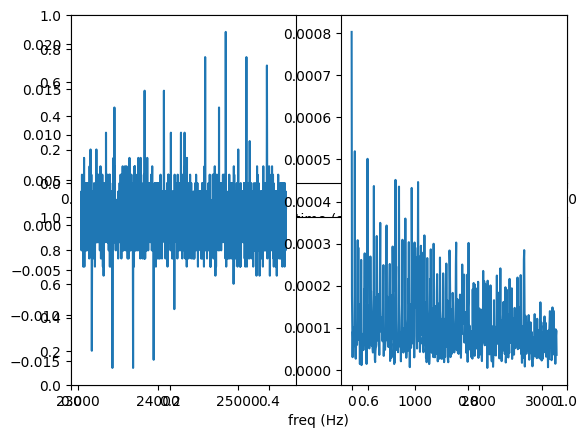

frame 10


<Figure size 1200x600 with 0 Axes>

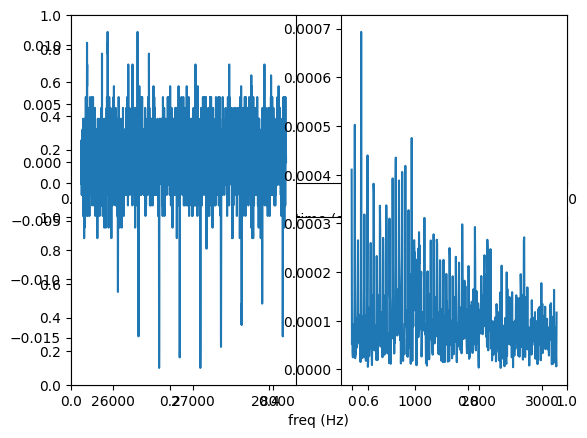

frame 11


<Figure size 1200x600 with 0 Axes>

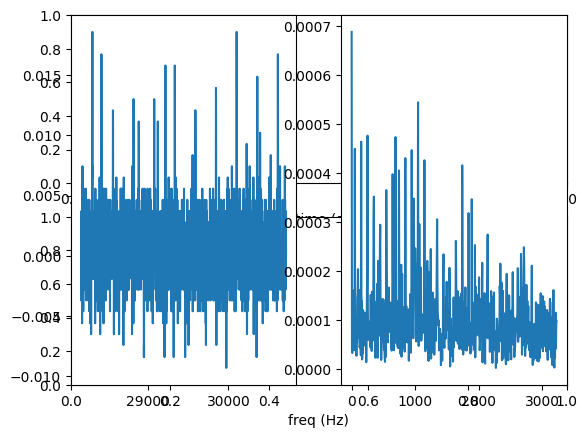

frame 12


<Figure size 1200x600 with 0 Axes>

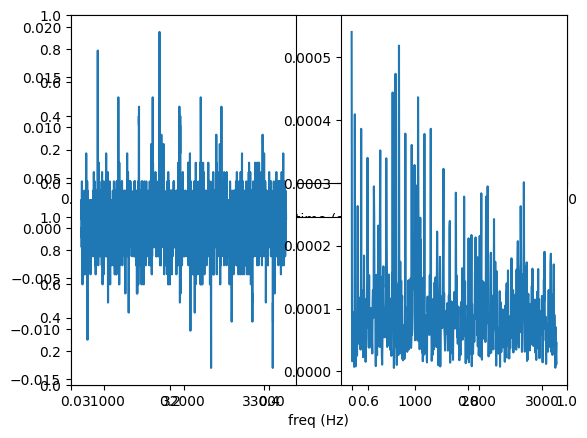

frame 13


<Figure size 1200x600 with 0 Axes>

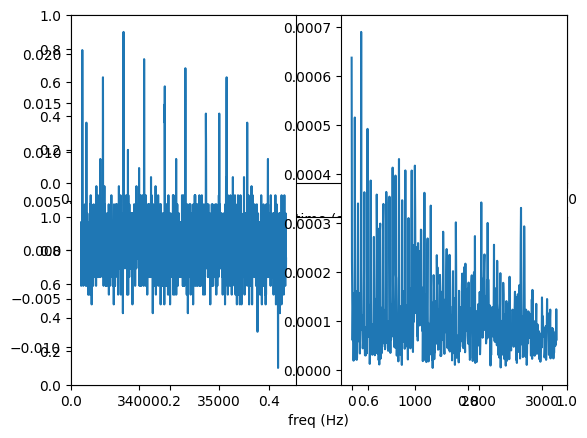

frame 14


<Figure size 1200x600 with 0 Axes>

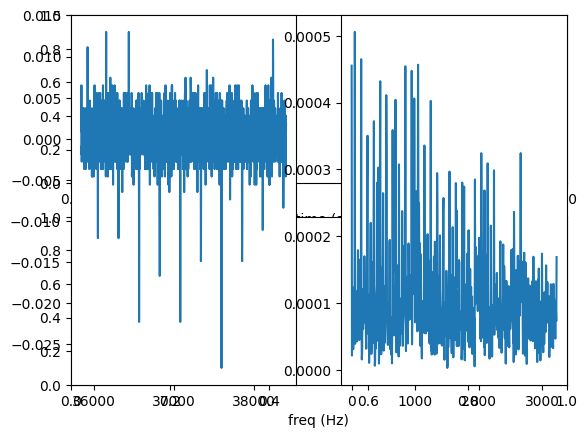

frame 15


<Figure size 1200x600 with 0 Axes>

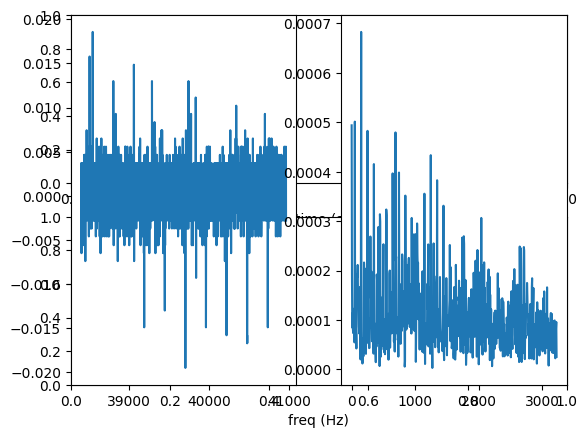

frame 16


<Figure size 1200x600 with 0 Axes>

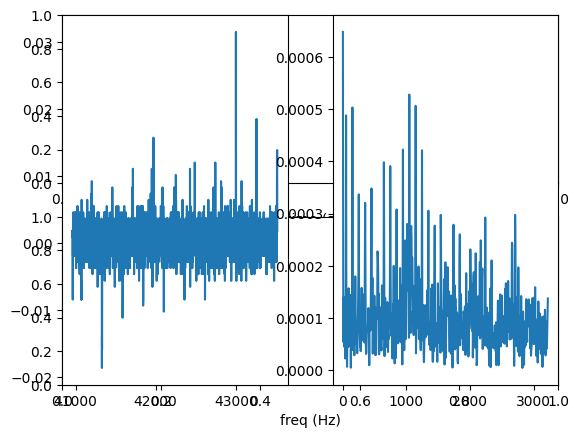

frame 17


<Figure size 1200x600 with 0 Axes>

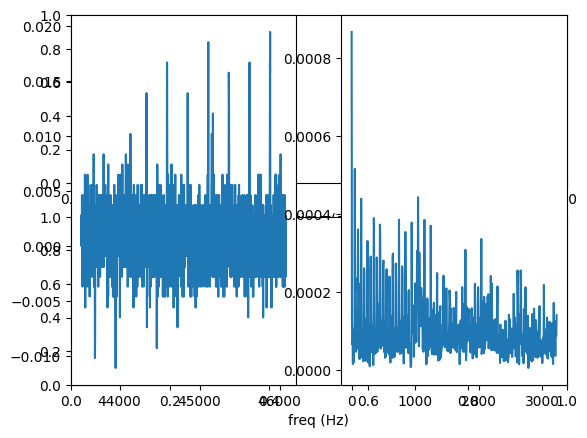

frame 18


<Figure size 1200x600 with 0 Axes>

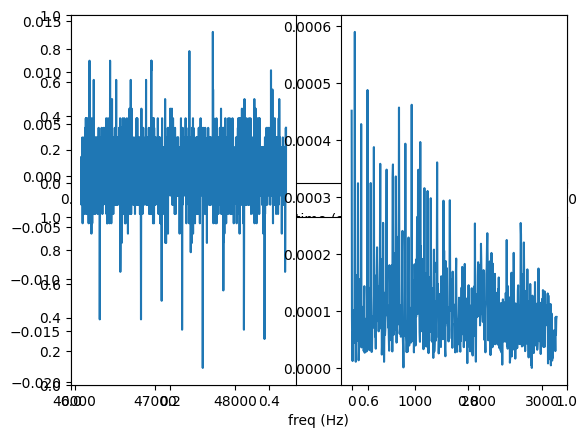

frame 19


<Figure size 1200x600 with 0 Axes>

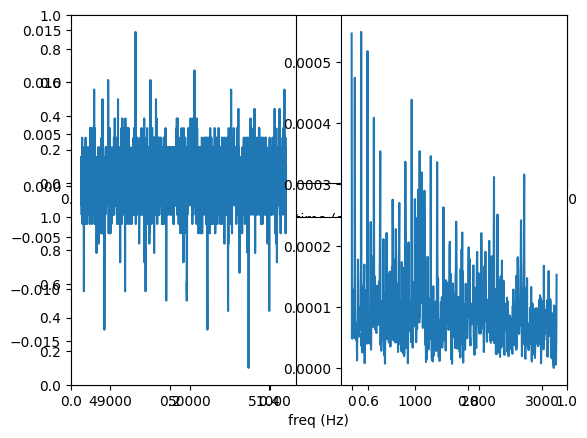

frame 20


<Figure size 1200x600 with 0 Axes>

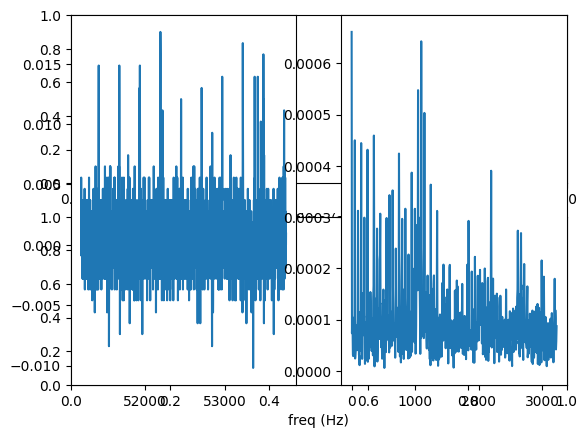

frame 21


<Figure size 1200x600 with 0 Axes>

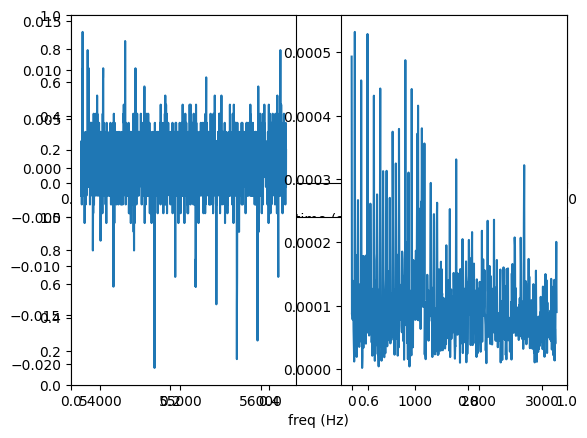

frame 22


<Figure size 1200x600 with 0 Axes>

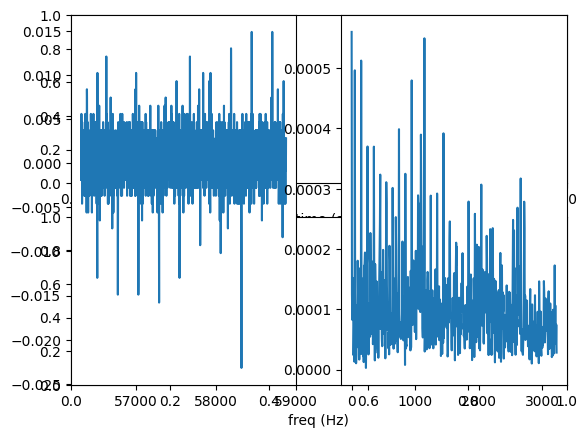

frame 23


<Figure size 1200x600 with 0 Axes>

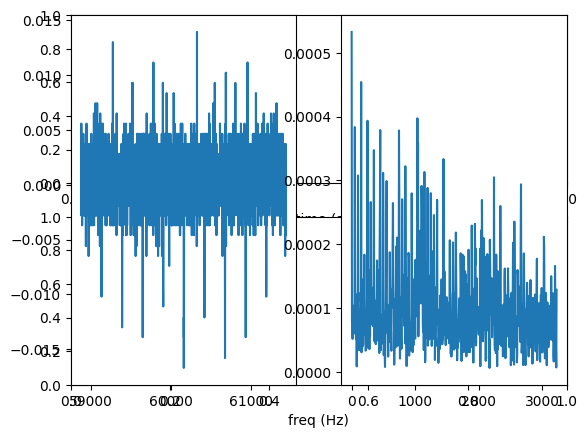

frame 24


<Figure size 1200x600 with 0 Axes>

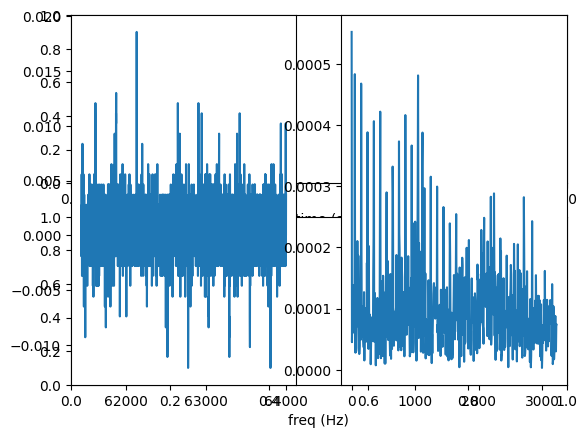

frame 25


<Figure size 1200x600 with 0 Axes>

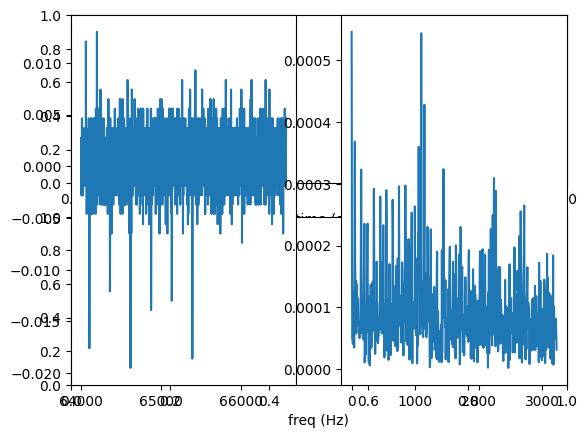

frame 26


<Figure size 1200x600 with 0 Axes>

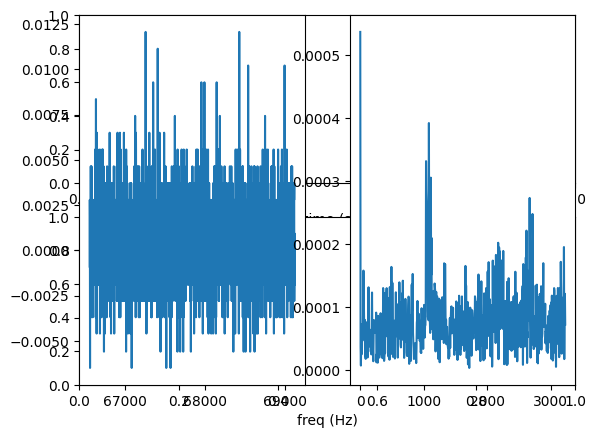

frame 27


<Figure size 1200x600 with 0 Axes>

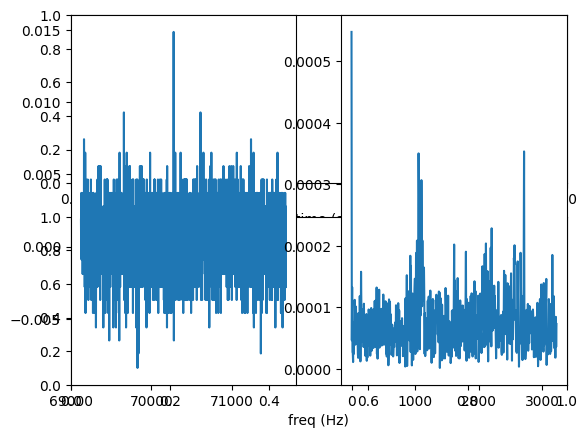

frame 28


<Figure size 1200x600 with 0 Axes>

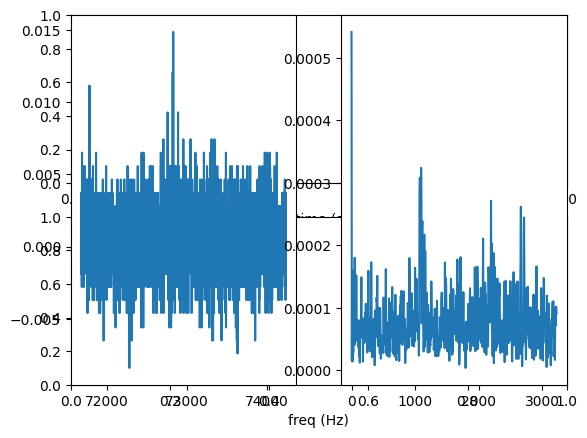

frame 29


<Figure size 1200x600 with 0 Axes>

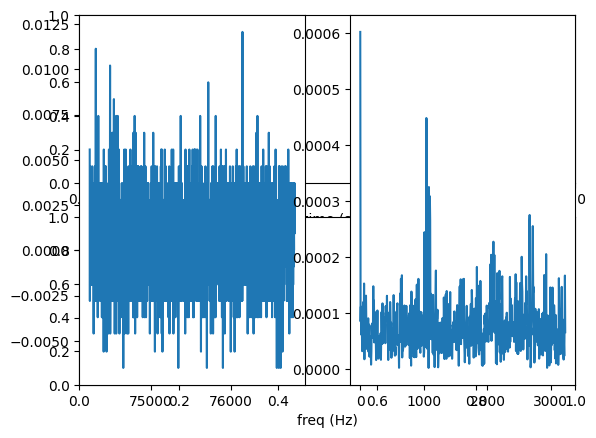

frame 30


<Figure size 1200x600 with 0 Axes>

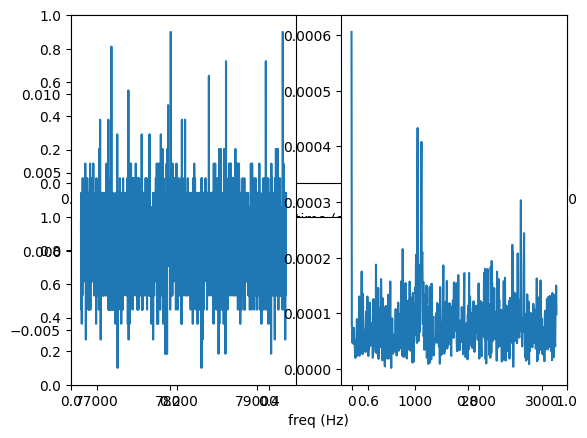

frame 31


<Figure size 1200x600 with 0 Axes>

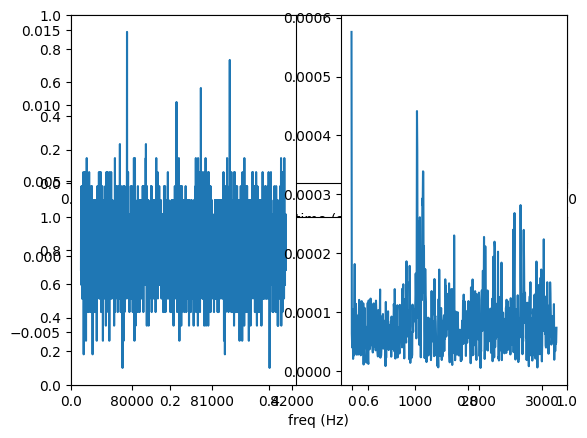

frame 32


<Figure size 1200x600 with 0 Axes>

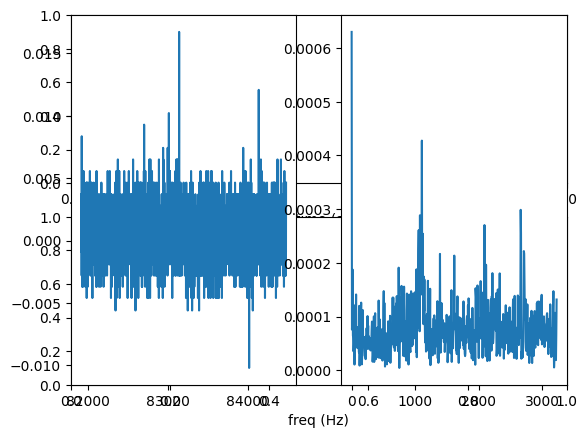

frame 33


<Figure size 1200x600 with 0 Axes>

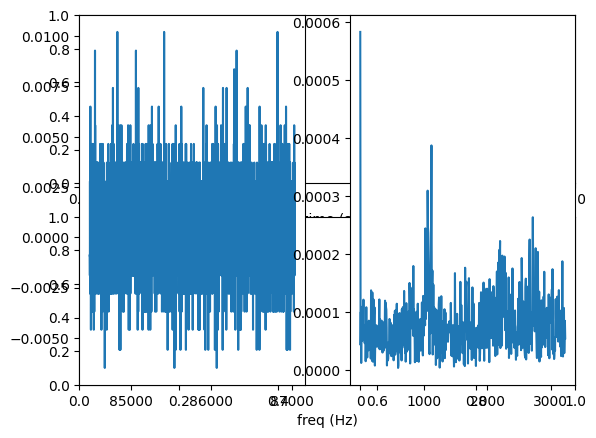

frame 34


<Figure size 1200x600 with 0 Axes>

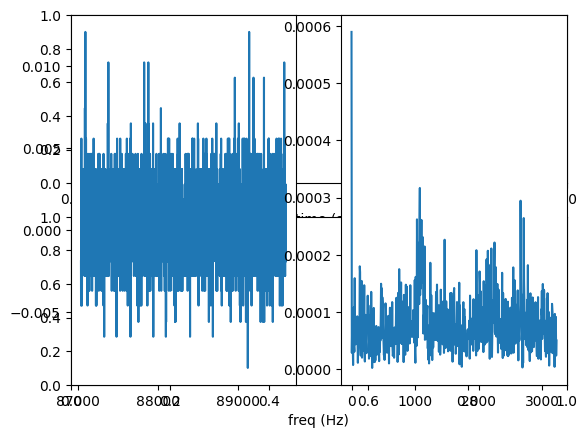

frame 35


<Figure size 1200x600 with 0 Axes>

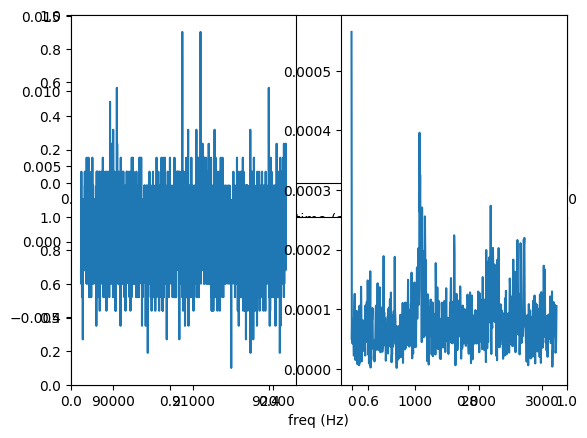

frame 36


<Figure size 1200x600 with 0 Axes>

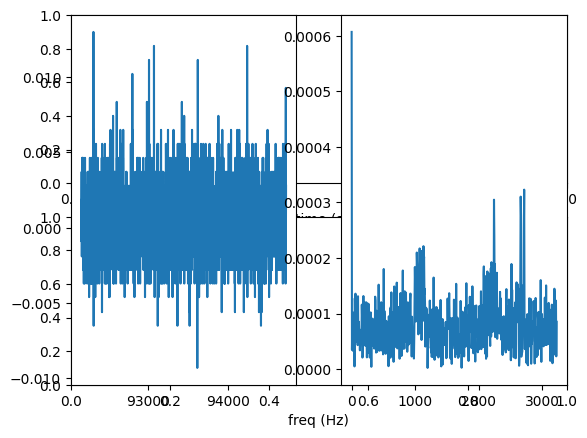

frame 37


<Figure size 1200x600 with 0 Axes>

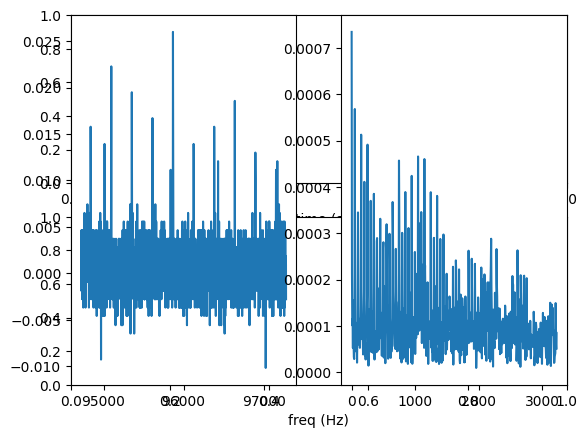

frame 38


<Figure size 1200x600 with 0 Axes>

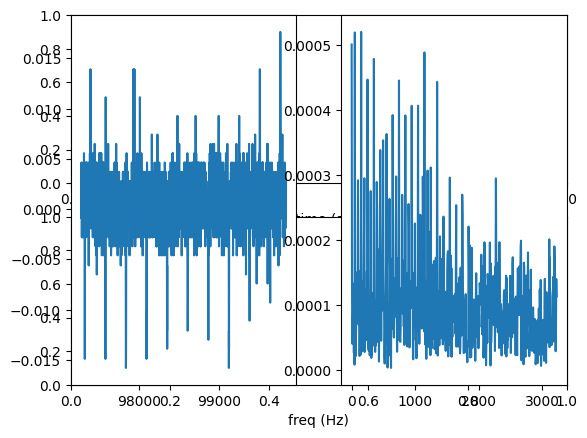

frame 39


<Figure size 1200x600 with 0 Axes>

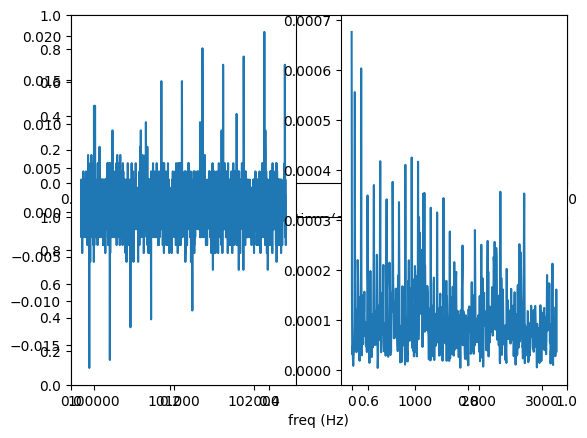

frame 40


<Figure size 1200x600 with 0 Axes>

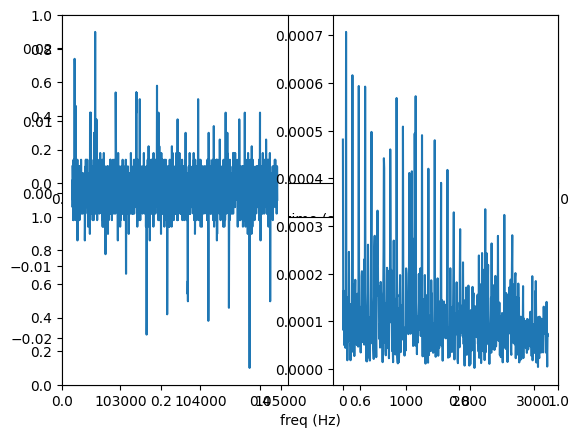

frame 41


<Figure size 1200x600 with 0 Axes>

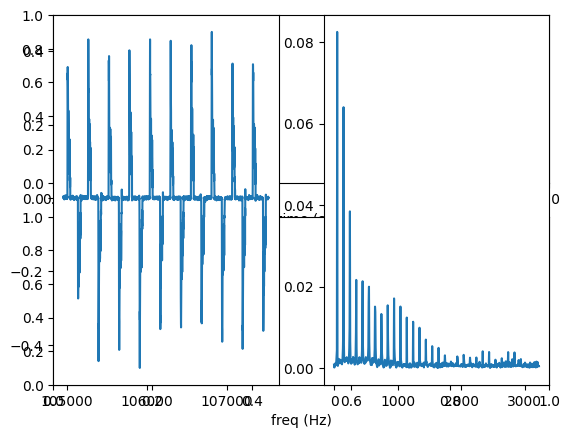

frame 42


<Figure size 1200x600 with 0 Axes>

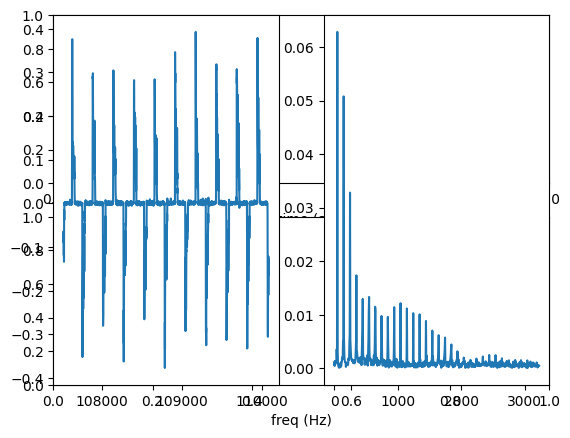

frame 43


<Figure size 1200x600 with 0 Axes>

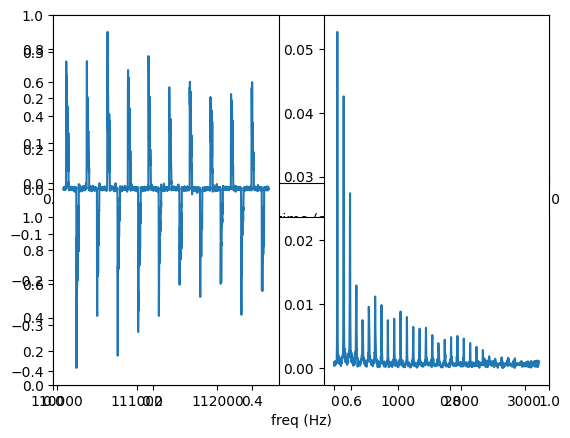

frame 44


<Figure size 1200x600 with 0 Axes>

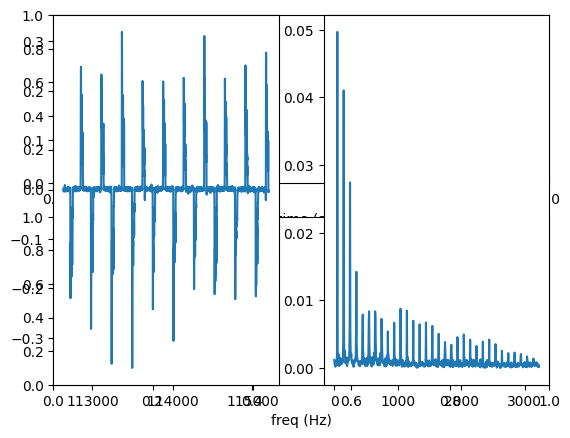

frame 45


<Figure size 1200x600 with 0 Axes>

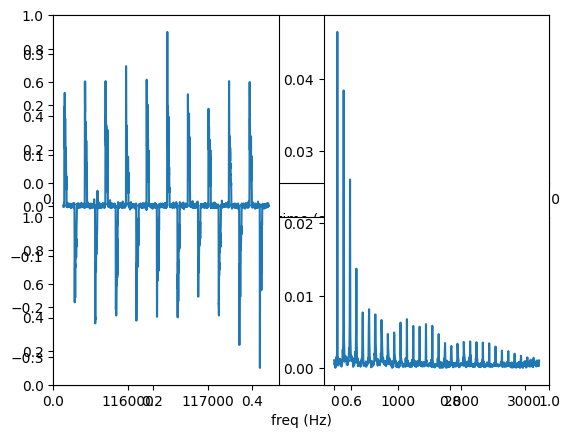

frame 46


<Figure size 1200x600 with 0 Axes>

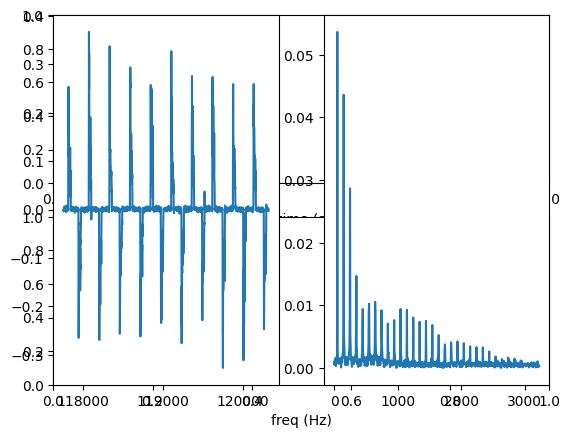

frame 47


<Figure size 1200x600 with 0 Axes>

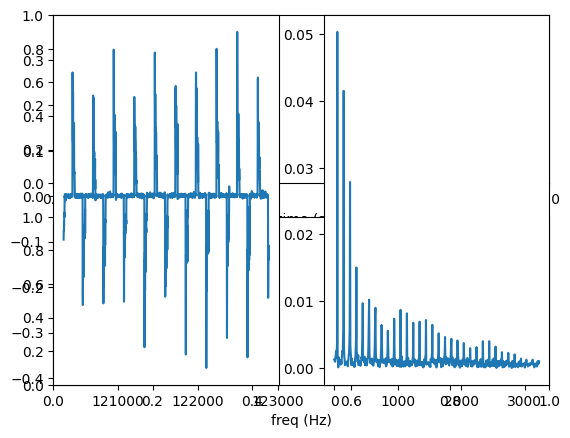

frame 48


<Figure size 1200x600 with 0 Axes>

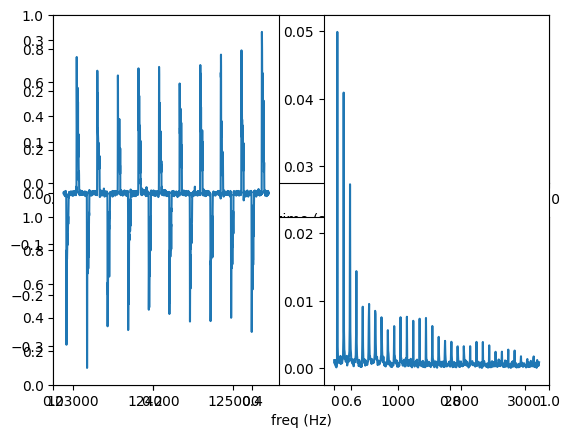

frame 49


<Figure size 1200x600 with 0 Axes>

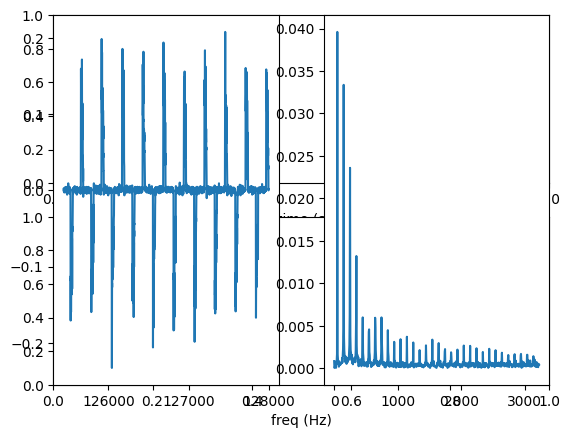

frame 50


<Figure size 1200x600 with 0 Axes>

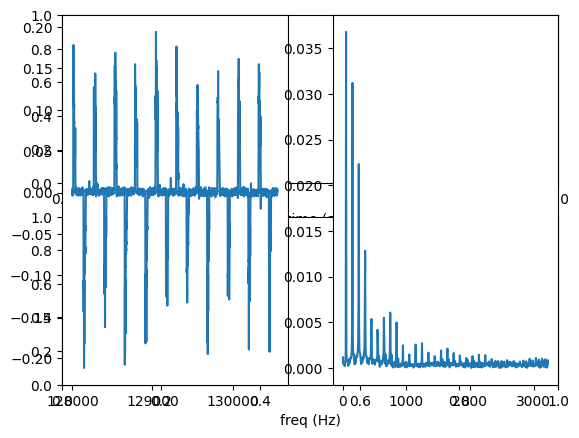

frame 51


<Figure size 1200x600 with 0 Axes>

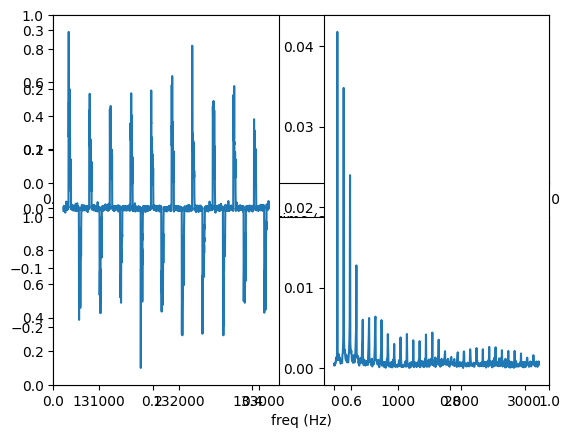

frame 52


<Figure size 1200x600 with 0 Axes>

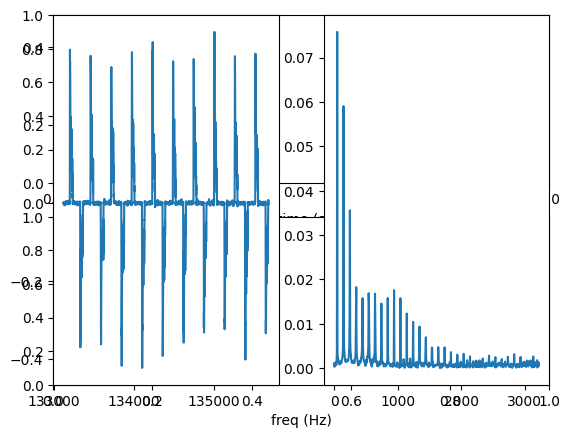

frame 53


<Figure size 1200x600 with 0 Axes>

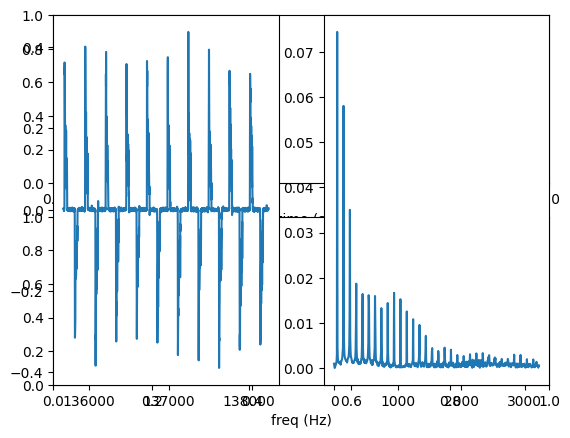

frame 54


<Figure size 1200x600 with 0 Axes>

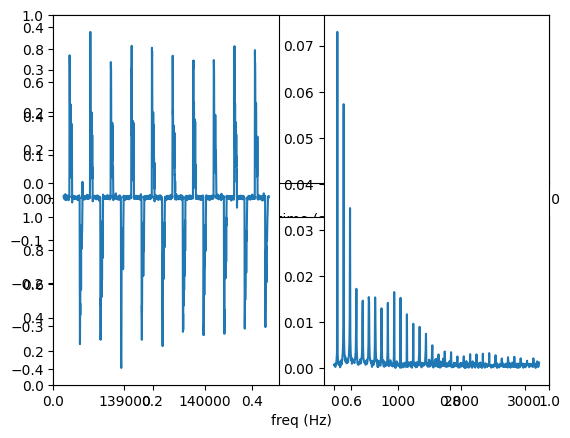

frame 55


<Figure size 1200x600 with 0 Axes>

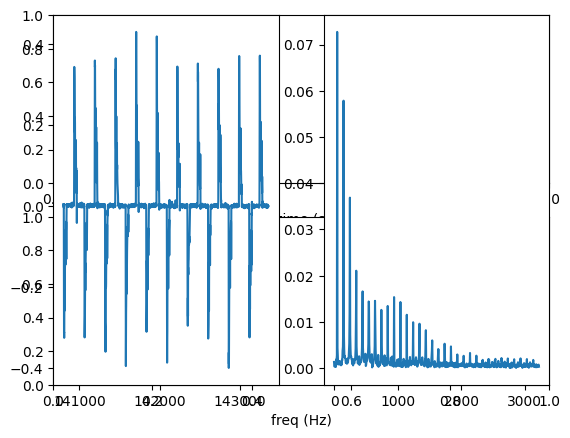

frame 56


<Figure size 1200x600 with 0 Axes>

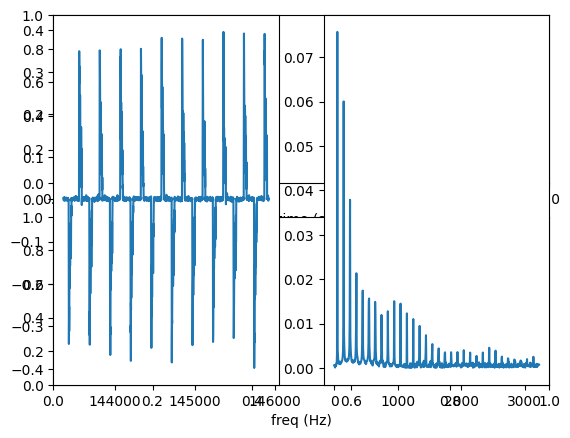

frame 57


<Figure size 1200x600 with 0 Axes>

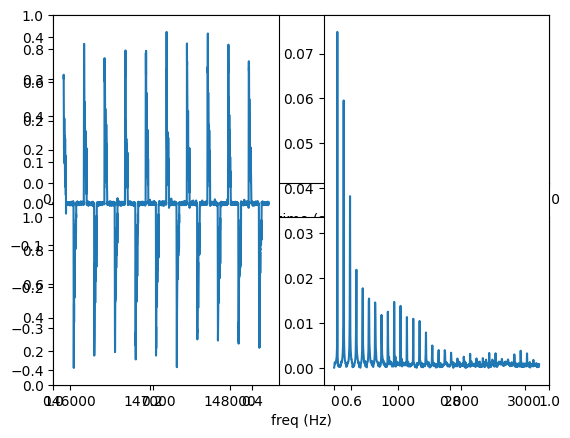

frame 58


<Figure size 1200x600 with 0 Axes>

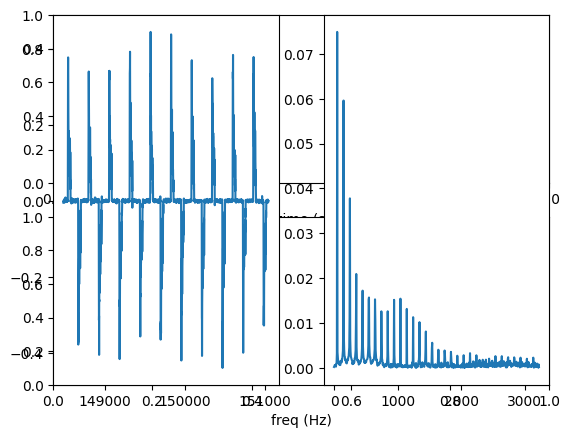

frame 59


<Figure size 1200x600 with 0 Axes>

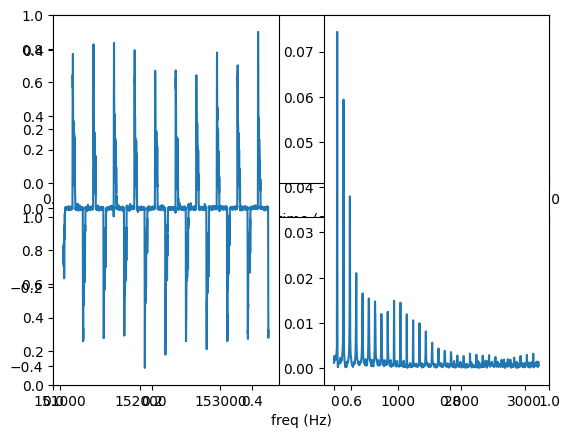

frame 60


<Figure size 1200x600 with 0 Axes>

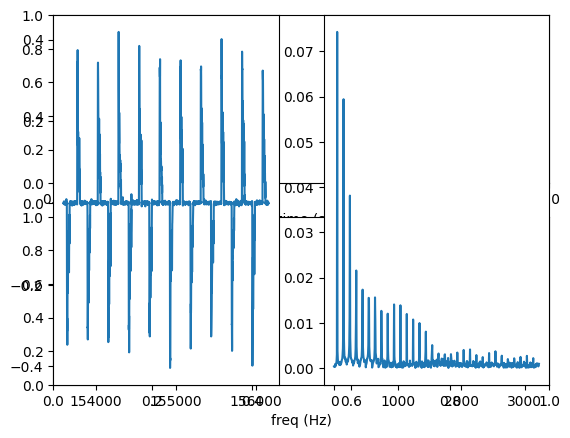

frame 61


<Figure size 1200x600 with 0 Axes>

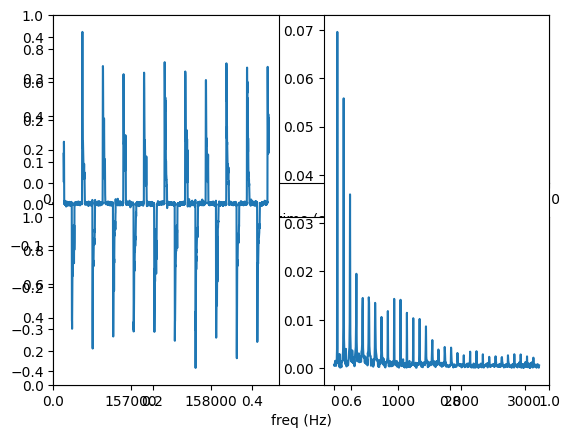

frame 62


<Figure size 1200x600 with 0 Axes>

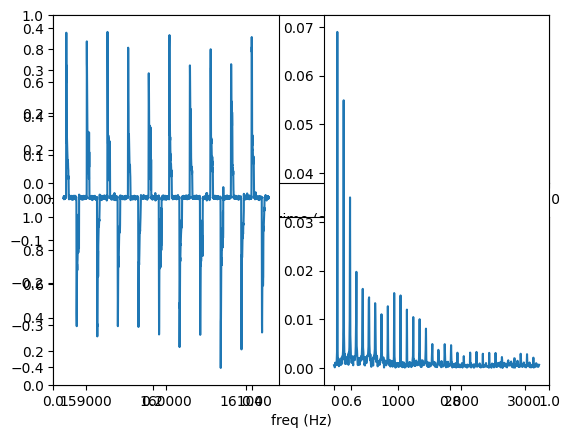

frame 63


<Figure size 1200x600 with 0 Axes>

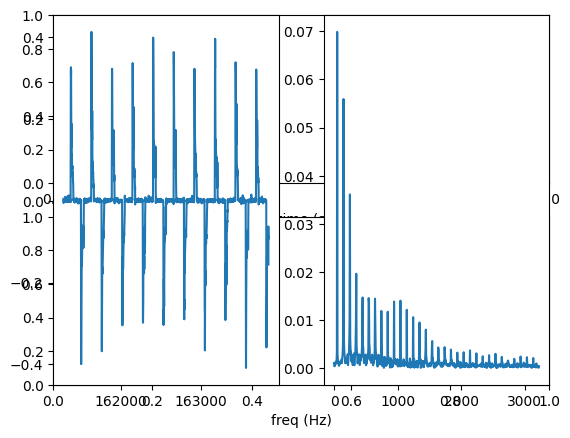

frame 64


<Figure size 1200x600 with 0 Axes>

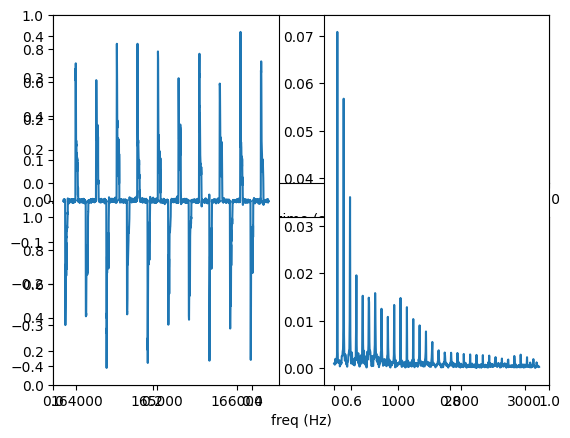

frame 65


<Figure size 1200x600 with 0 Axes>

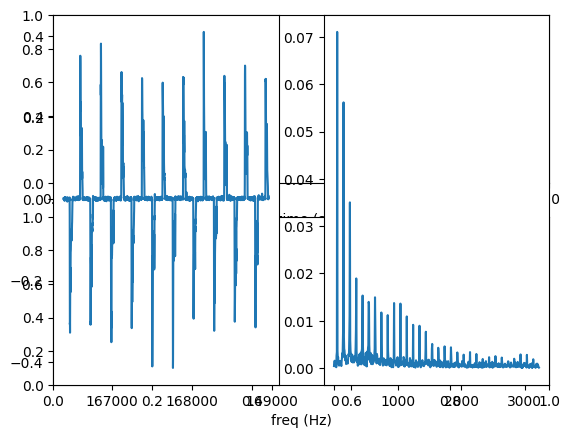

frame 66


<Figure size 1200x600 with 0 Axes>

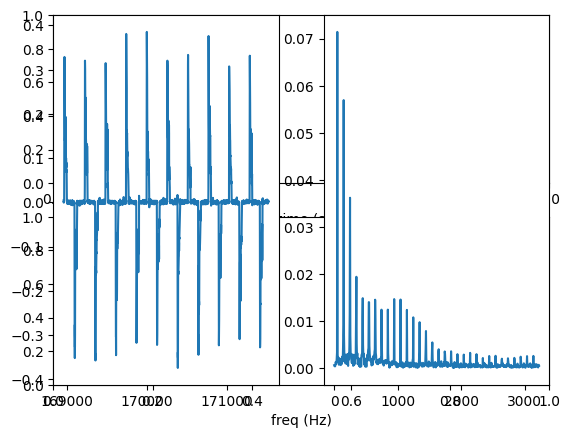

frame 67


<Figure size 1200x600 with 0 Axes>

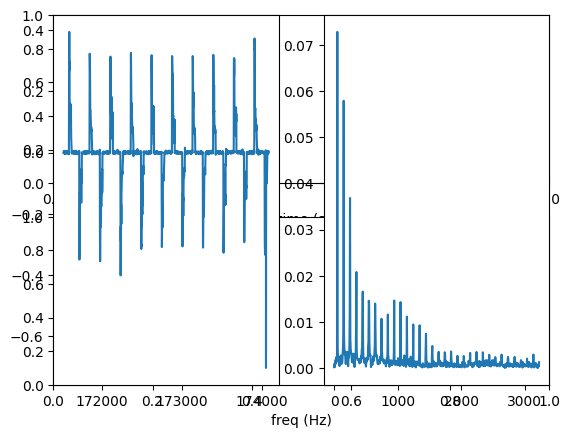

frame 68


<Figure size 1200x600 with 0 Axes>

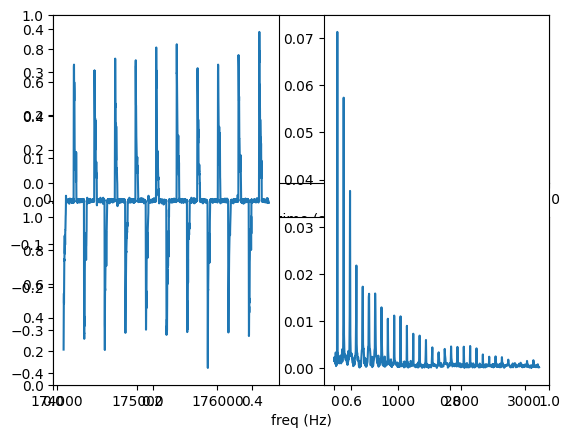

frame 69


<Figure size 1200x600 with 0 Axes>

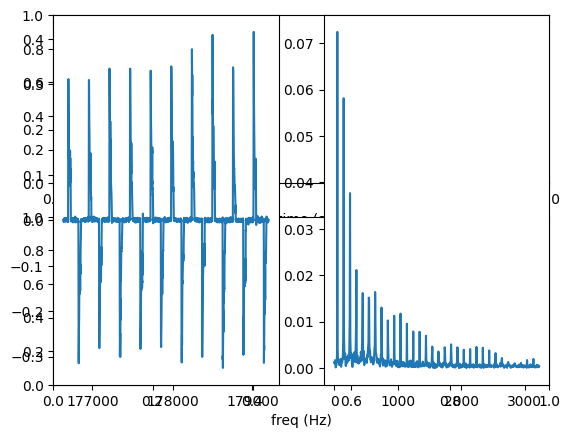

frame 70


<Figure size 1200x600 with 0 Axes>

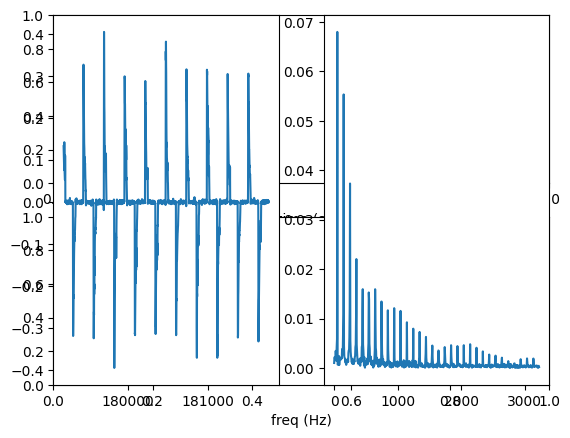

frame 71


<Figure size 1200x600 with 0 Axes>

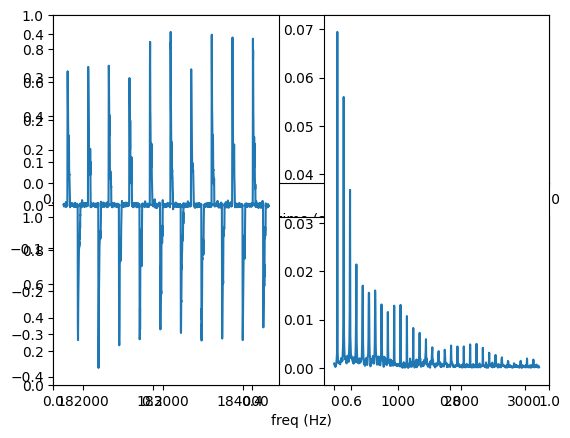

frame 72


<Figure size 1200x600 with 0 Axes>

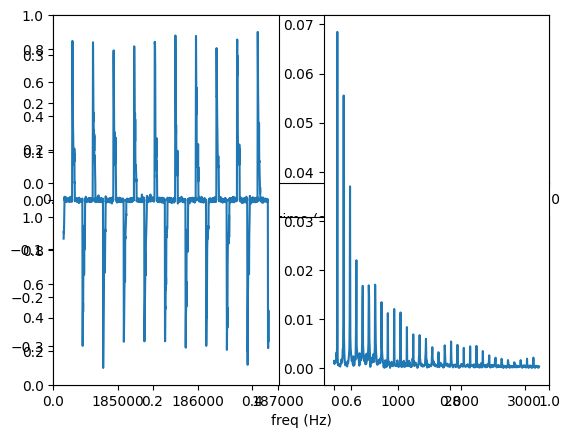

frame 73


<Figure size 1200x600 with 0 Axes>

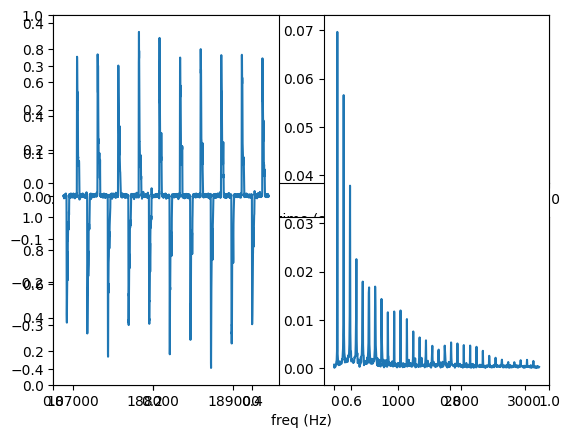

frame 74


<Figure size 1200x600 with 0 Axes>

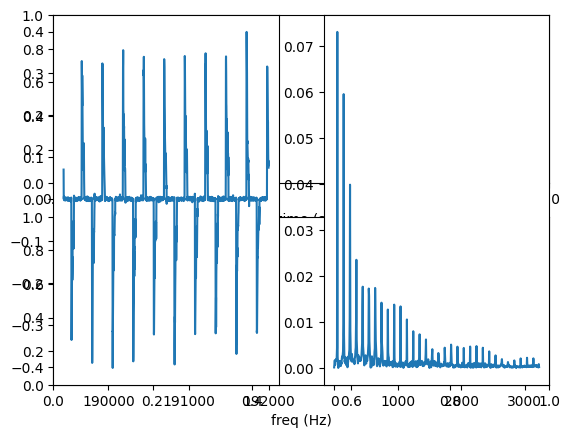

frame 75


<Figure size 1200x600 with 0 Axes>

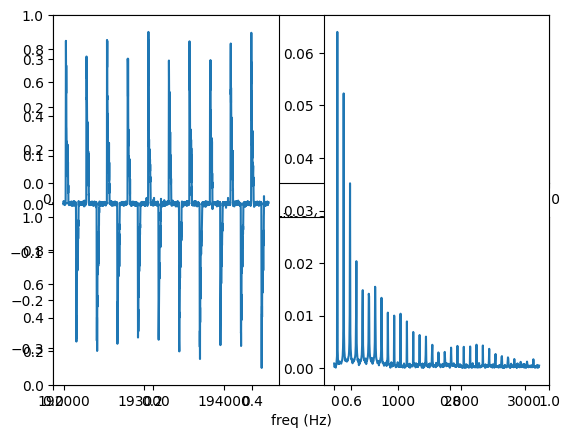

frame 76


<Figure size 1200x600 with 0 Axes>

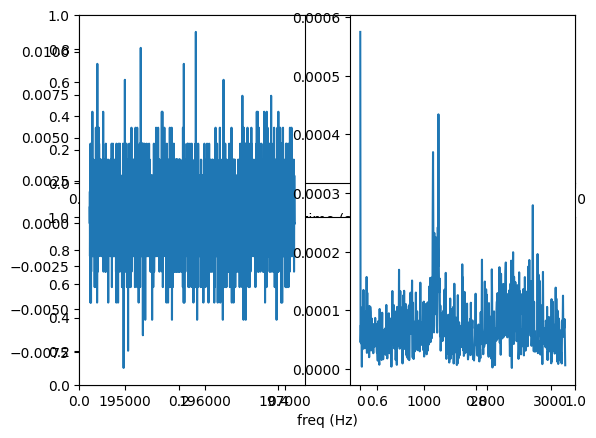

frame 77


<Figure size 1200x600 with 0 Axes>

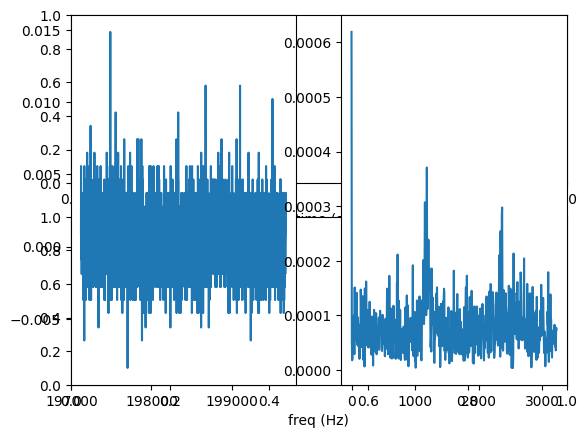

In [20]:
fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_C=[]

i=0
while i<len(windows_agregado_ad):





#while i<len(windows)/2:
  pf1=windows_agregado_ad[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['CIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_C.append(H_A_30)
#plot
  plt.figure(figsize = (12, 6))
  fig, [ax1, ax2]=plt.subplots(nrows=2, ncols=1)

  print('frame',i)

  #ax1.plot(y, '.-')
  plt.subplot(121)

  plt.plot(y)

  plt.subplot(122)
  plt.plot(f_plot, X_mag_plot)
  ax1.set_xlabel('time (s')
  ax2.set_xlabel('freq (Hz)')

  plt.show()

  i=i+1

In [21]:
H_C[55][0]

np.float64(0.07272177051855877)

# H_D

In [22]:
fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_D=[]

i=0
while i<len(windows_agregado_ad):





#while i<len(windows)/2:
  pf1=windows_agregado_ad[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['DIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_D.append(H_A_30)
#plot
  #plt.figure(figsize = (12, 6))
 # fig, [ax1, ax2]=plt.subplots(nrows=2, ncols=1)



  #ax1.plot(y, '.-')
  #plt.subplot(121)

  #plt.plot(y)

  #plt.subplot(122)
  #plt.plot(f_plot, X_mag_plot)
  #ax1.set_xlabel('time (s')
  #ax2.set_xlabel('freq (Hz)')

  #plt.show()

  i=i+1

* channel B: 6:55
* channel C: 41:75
* channel D: 26:67

comparación H_C y H_C_mod

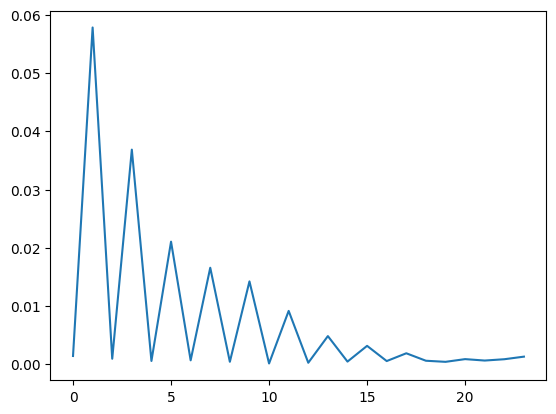

In [23]:
plt.plot(H_C[55][1:25])
#plt.plot(H_C_mod[55][1:25])

In [24]:
H_C[55][2]

np.float64(0.05784762529982926)

# CHANNEL B: TV LED detection

windows 0


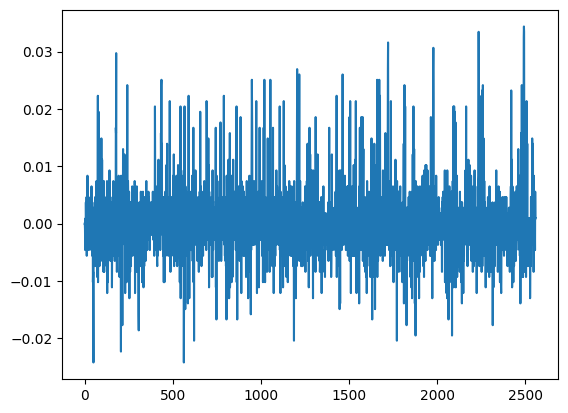

windows 1


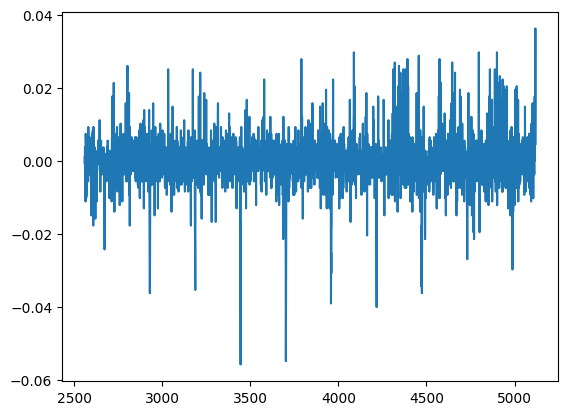

windows 2


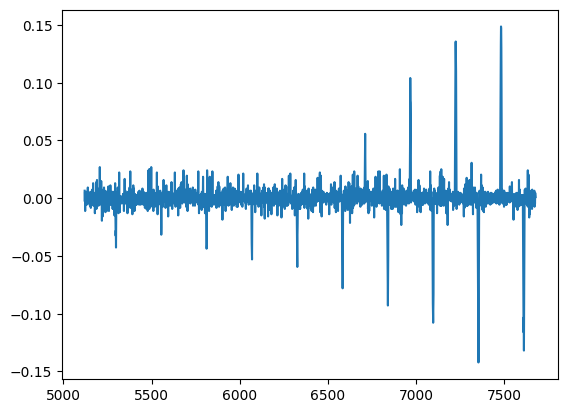

windows 3


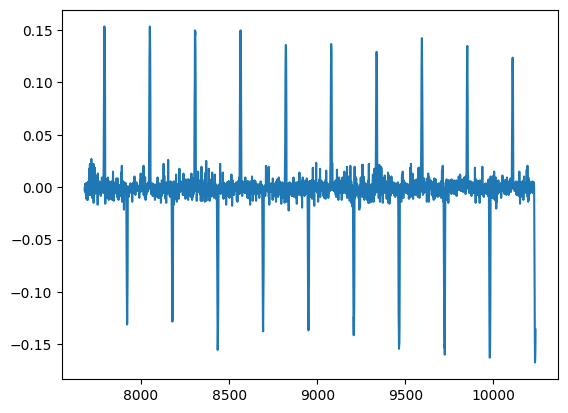

windows 4


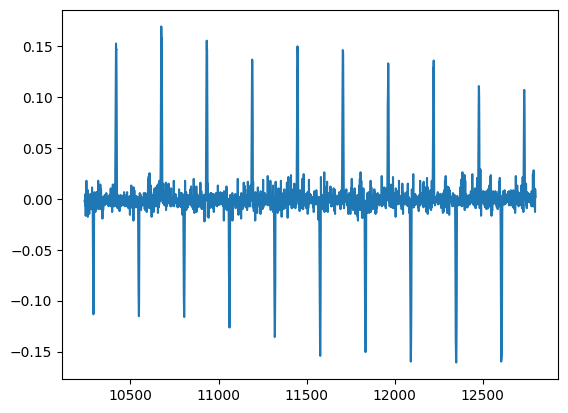

windows 5


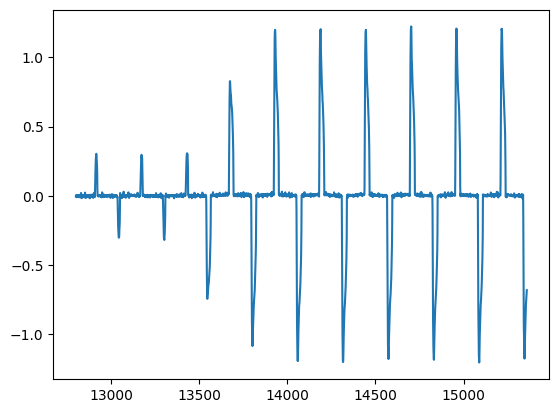

windows 6


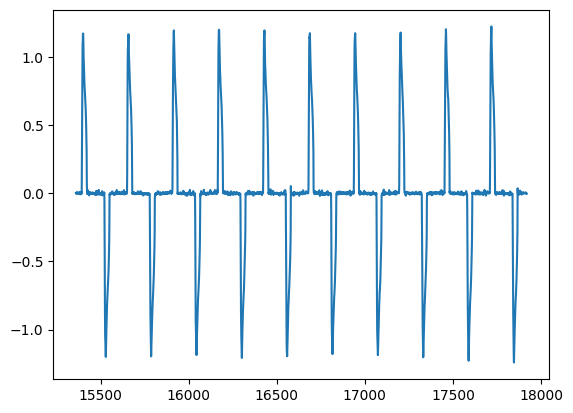

windows 7


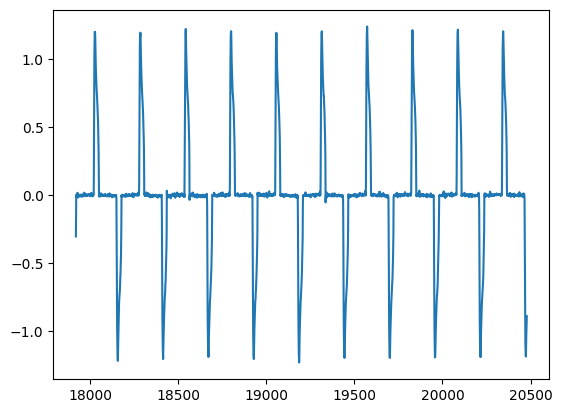

windows 8


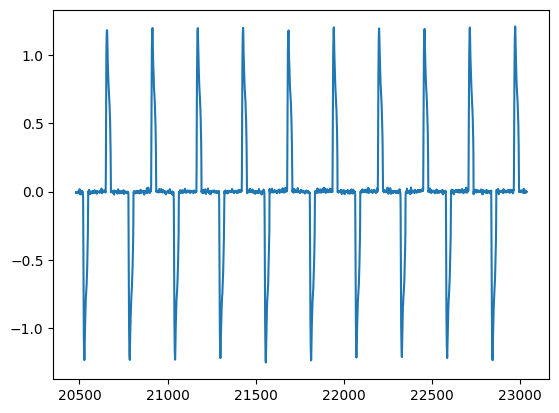

windows 9


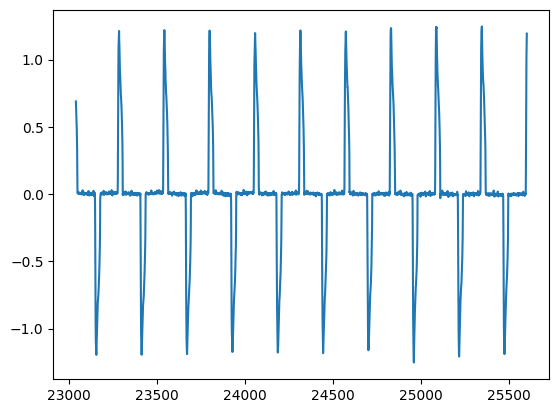

windows 10


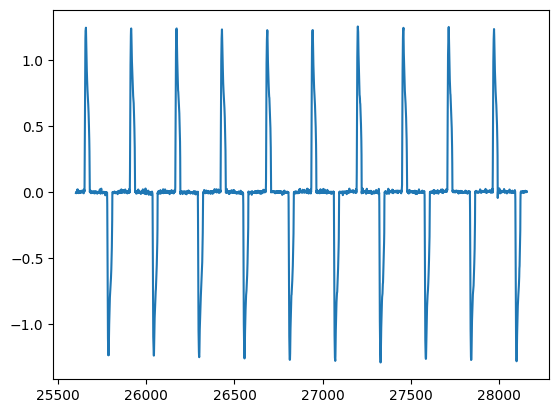

windows 11


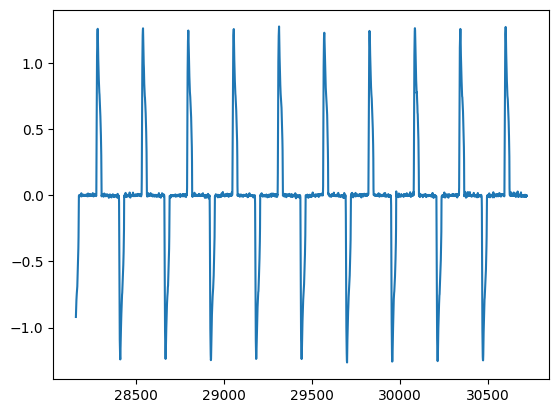

windows 12


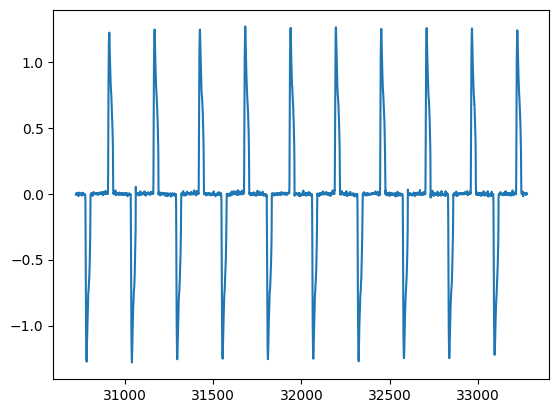

windows 13


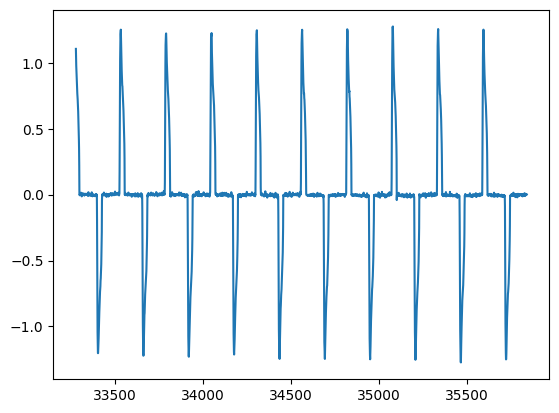

windows 14


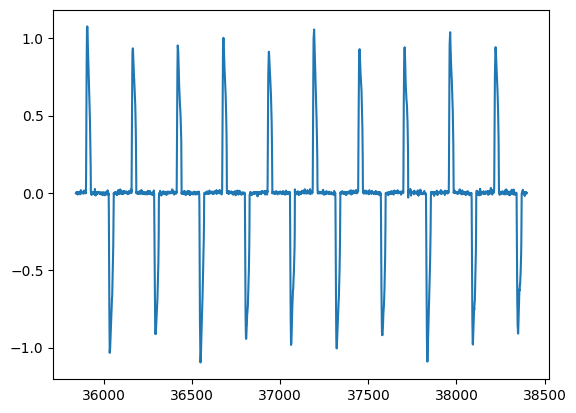

windows 15


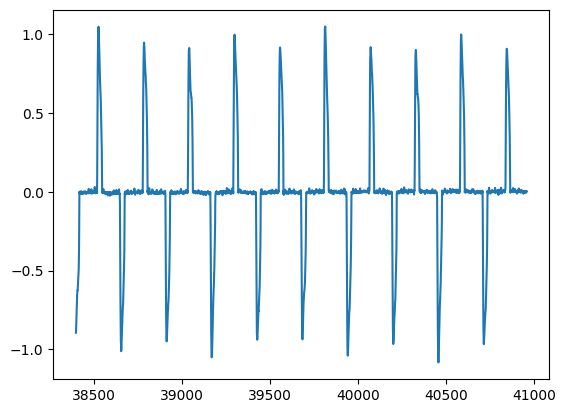

windows 16


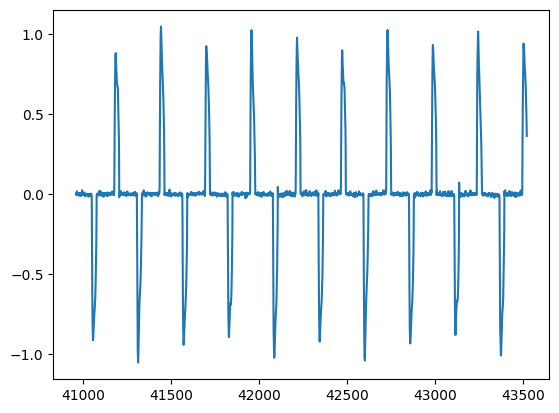

windows 17


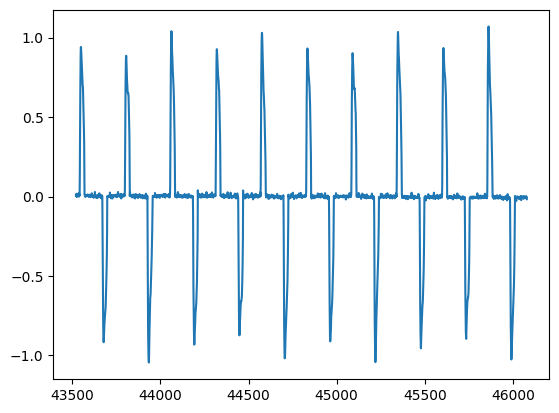

windows 18


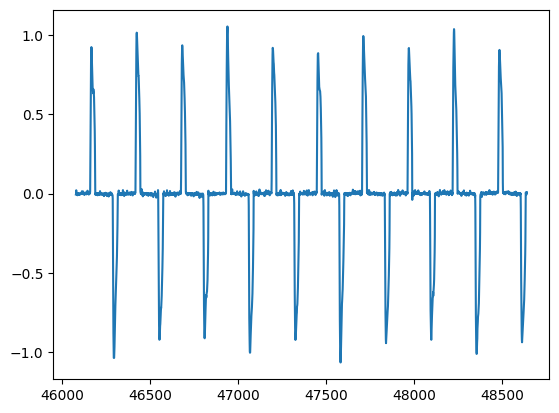

windows 19


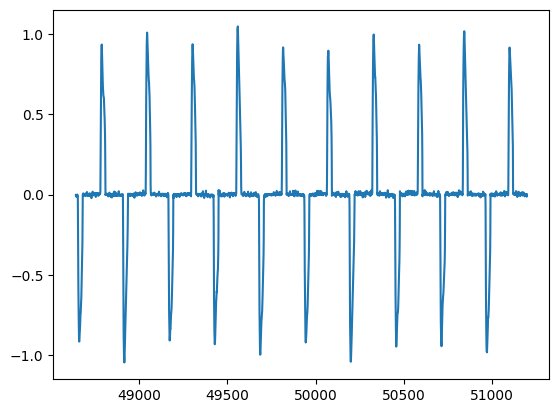

windows 20


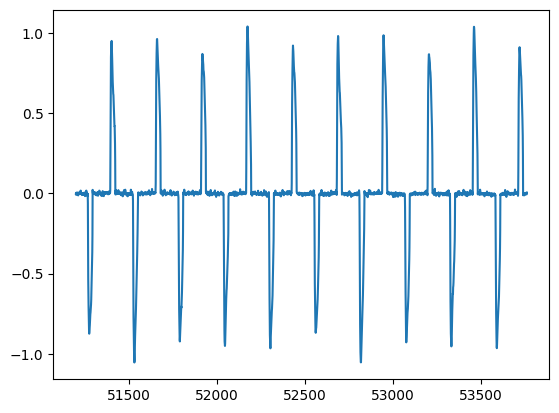

windows 21


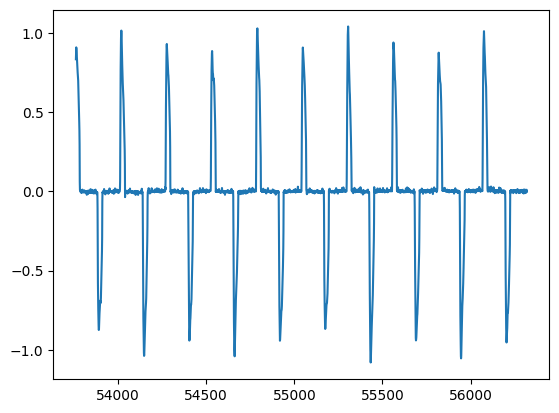

windows 22


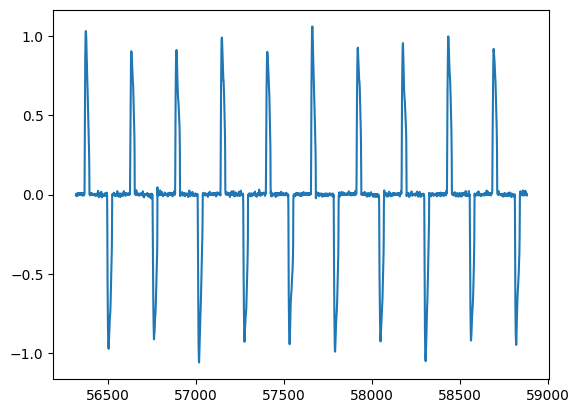

windows 23


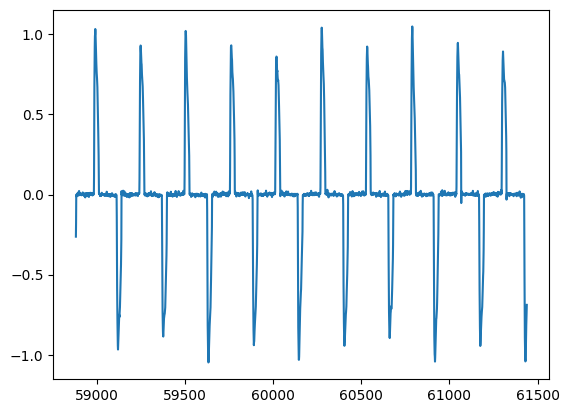

windows 24


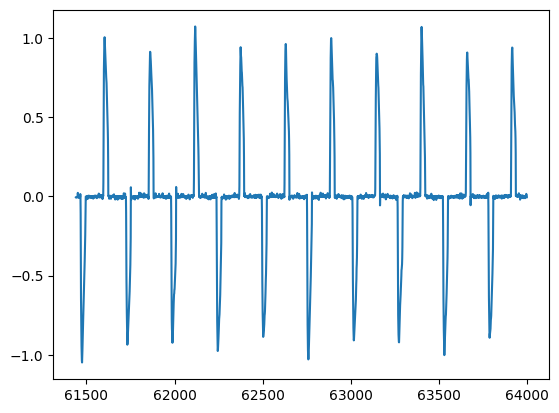

windows 25


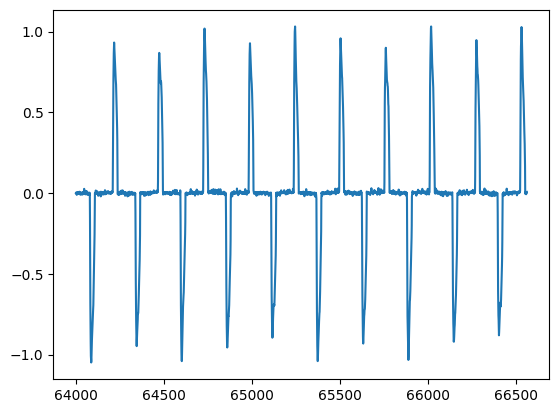

windows 26


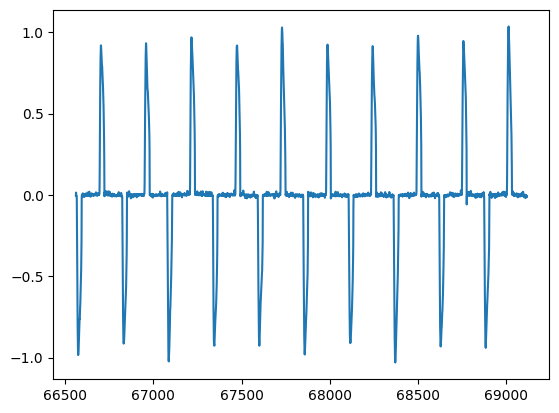

windows 27


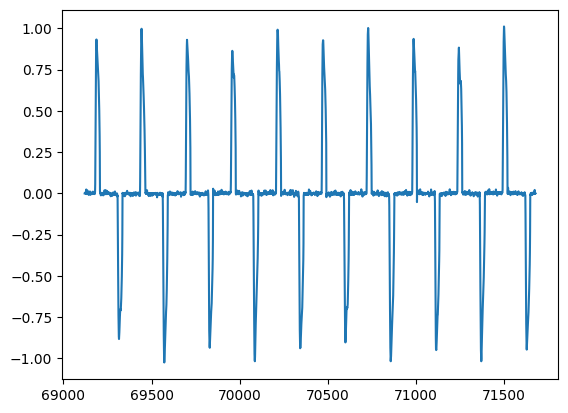

windows 28


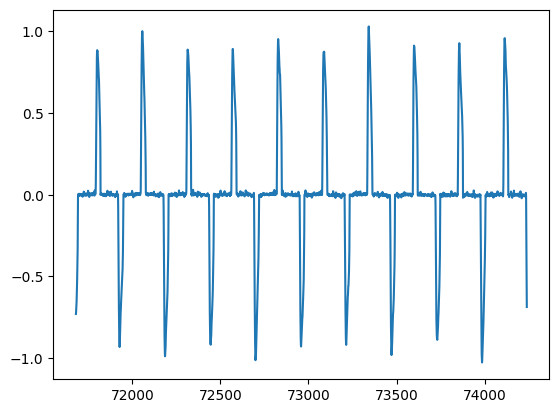

windows 29


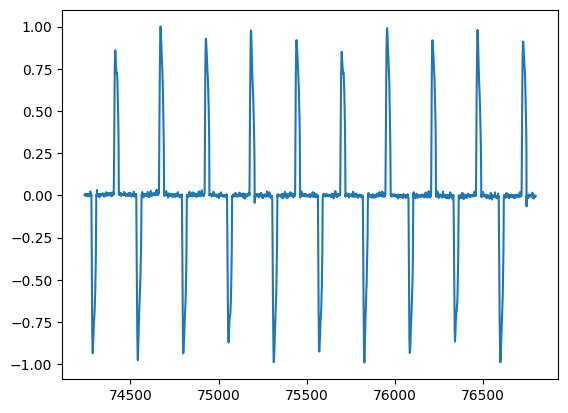

windows 30


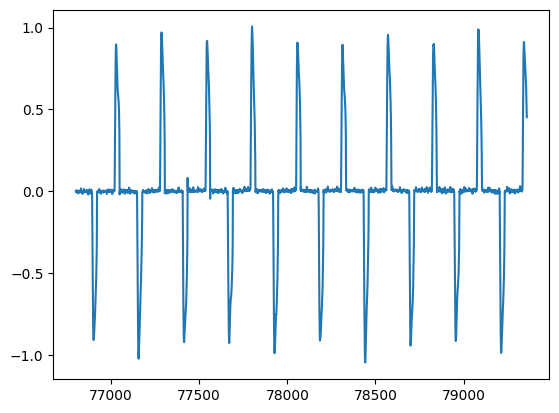

windows 31


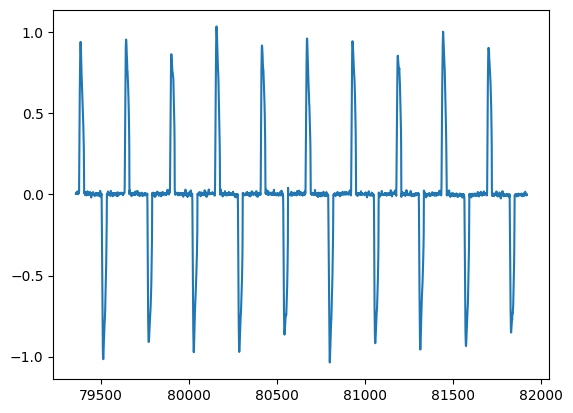

windows 32


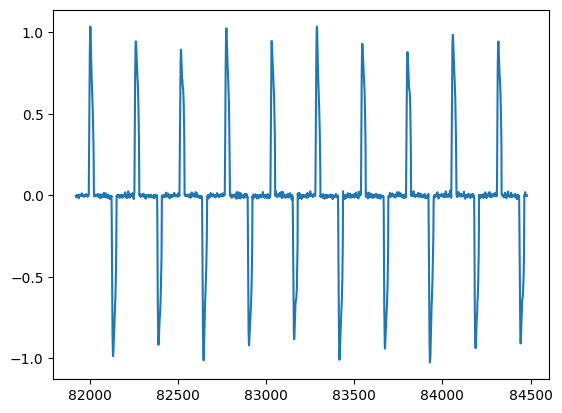

windows 33


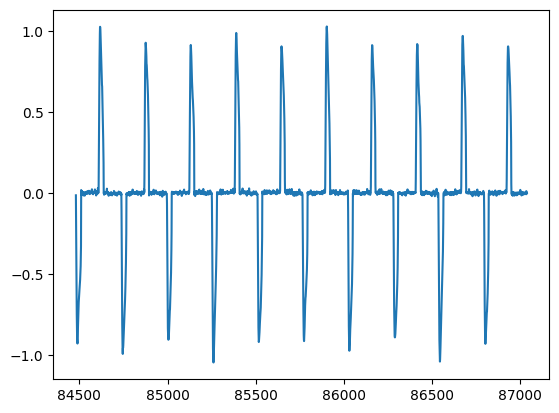

windows 34


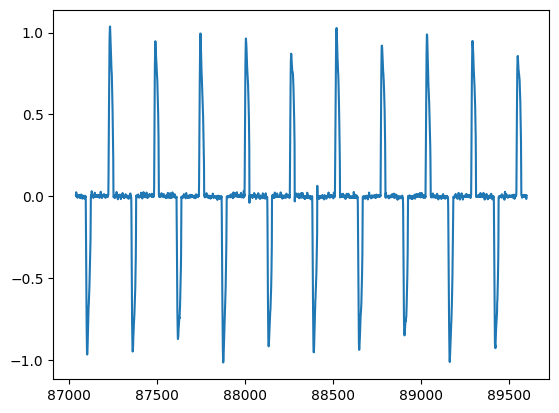

windows 35


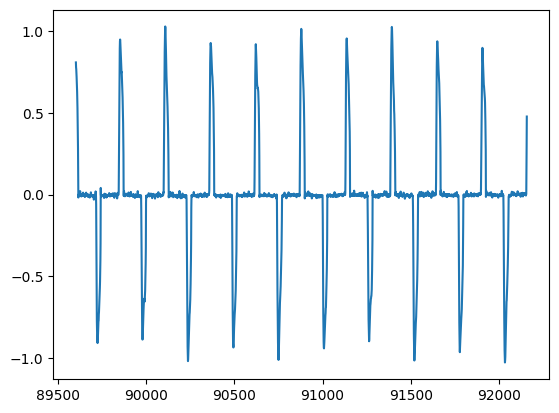

windows 36


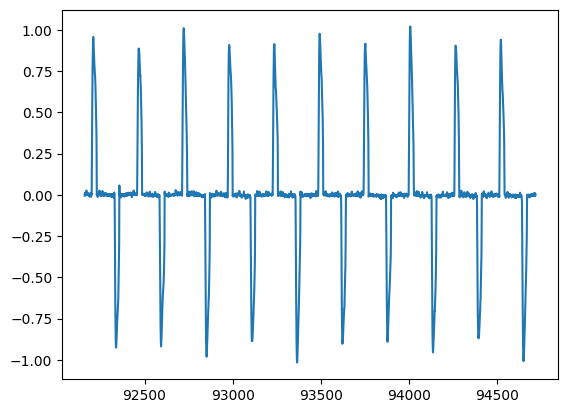

windows 37


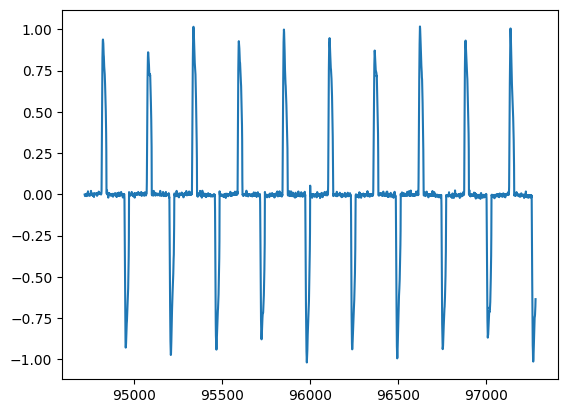

windows 38


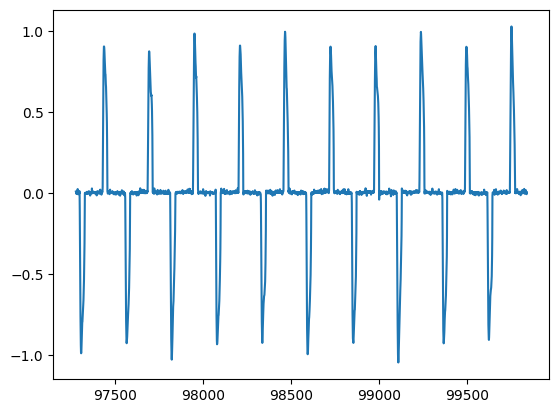

windows 39


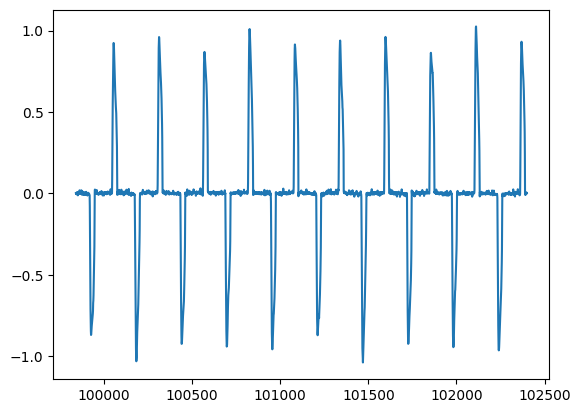

windows 40


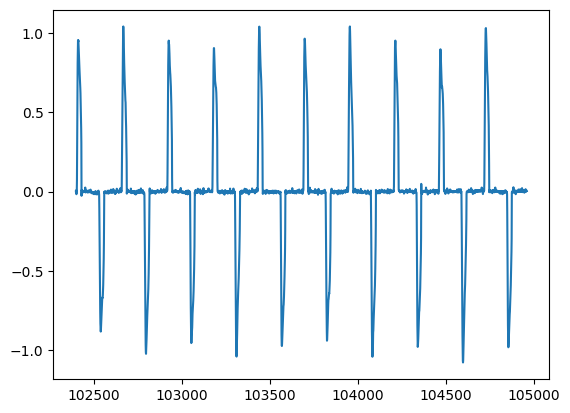

windows 41


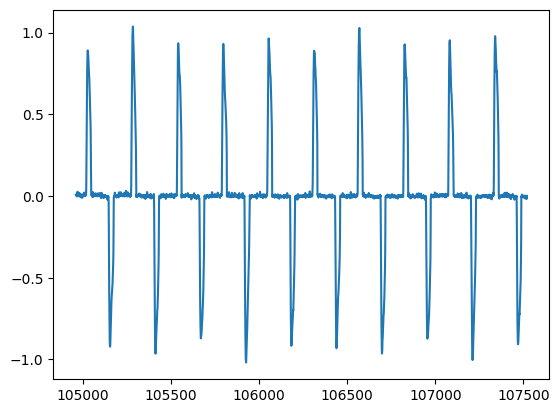

windows 42


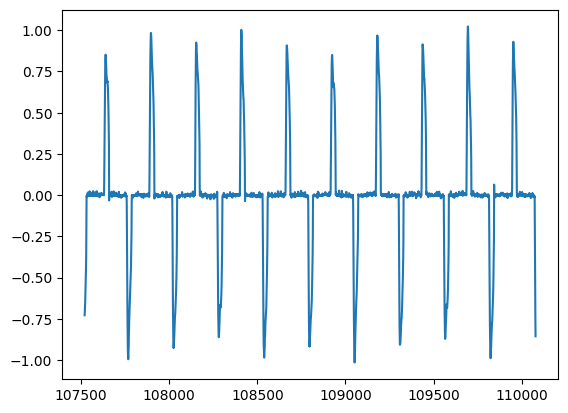

windows 43


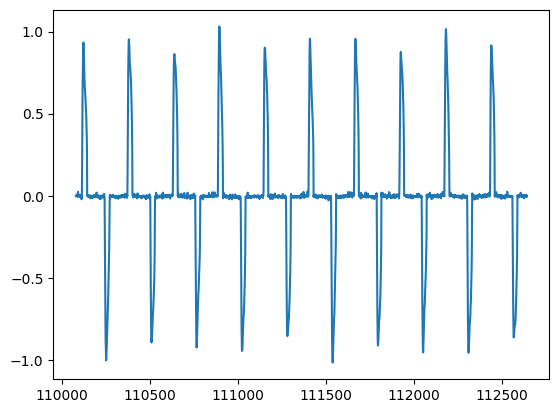

windows 44


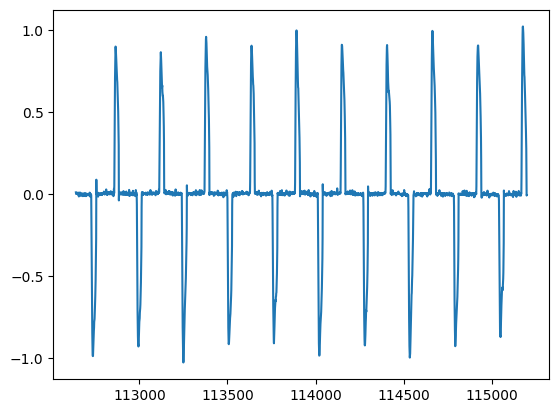

windows 45


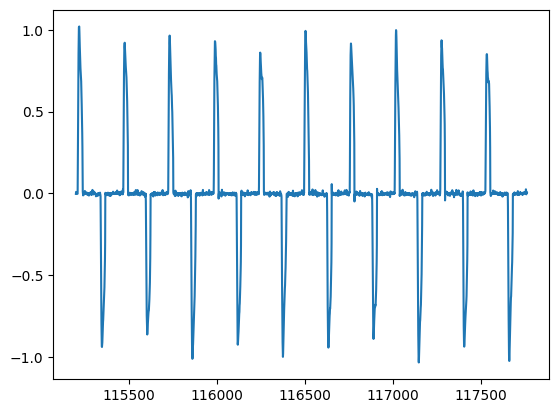

windows 46


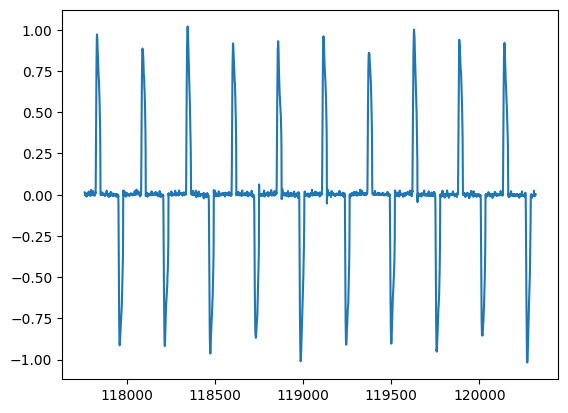

windows 47


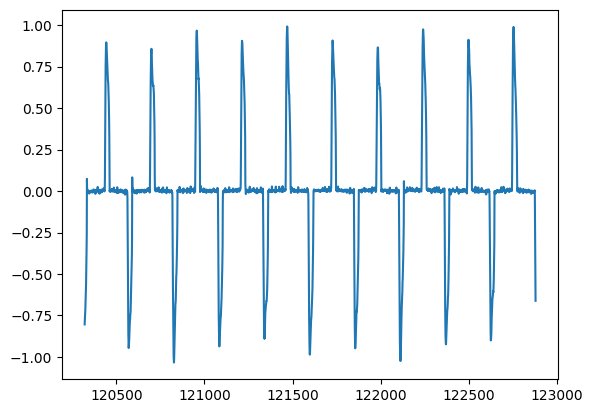

windows 48


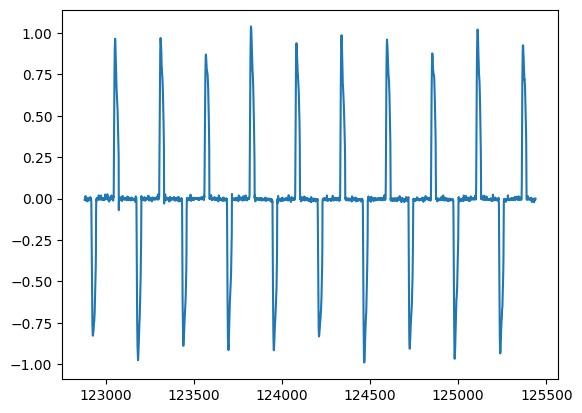

windows 49


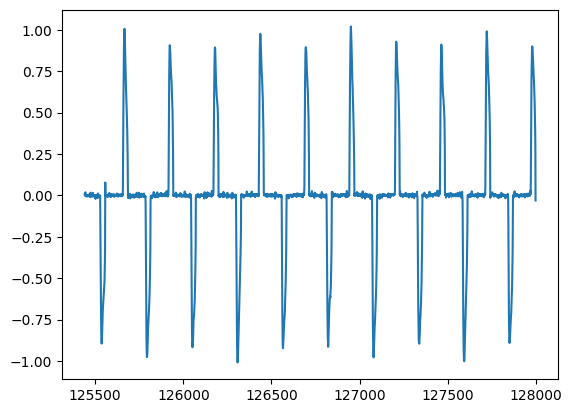

windows 50


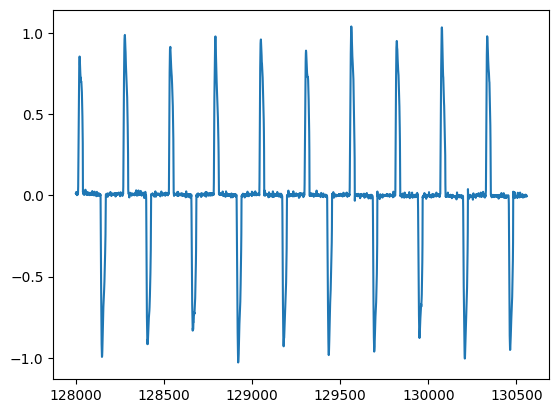

windows 51


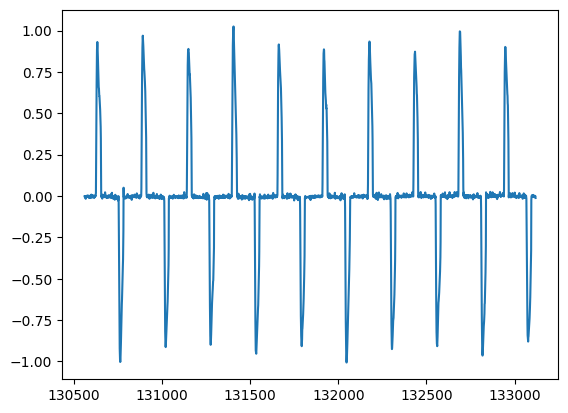

windows 52


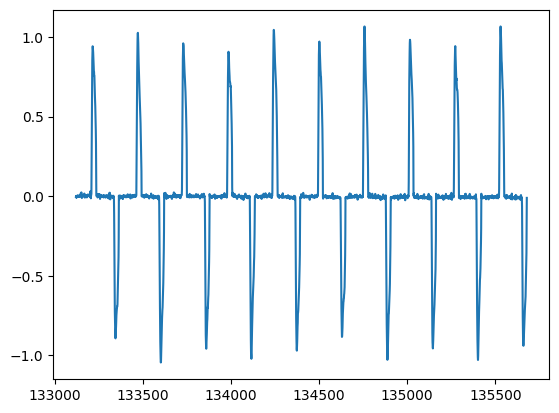

windows 53


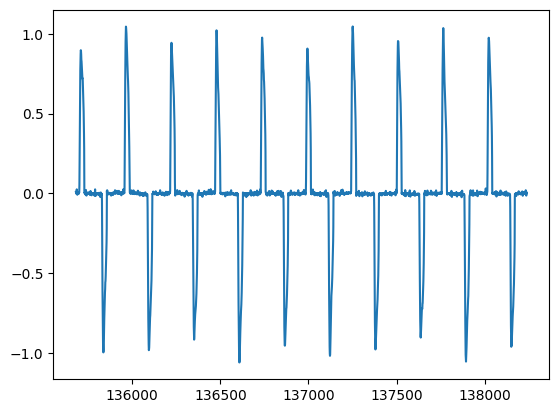

windows 54


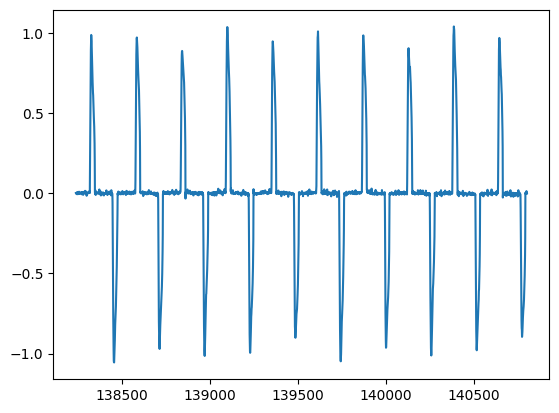

windows 55


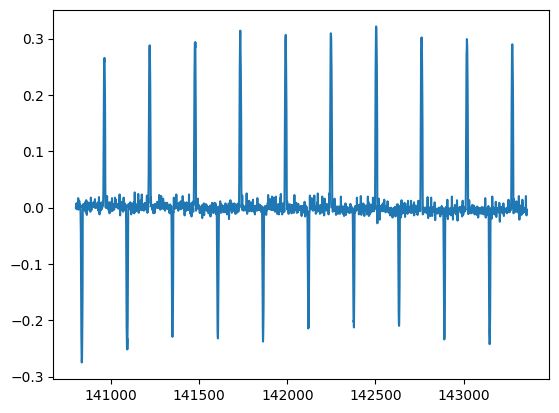

windows 56


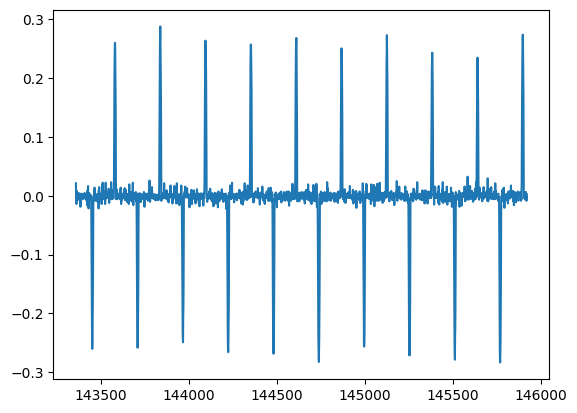

windows 57


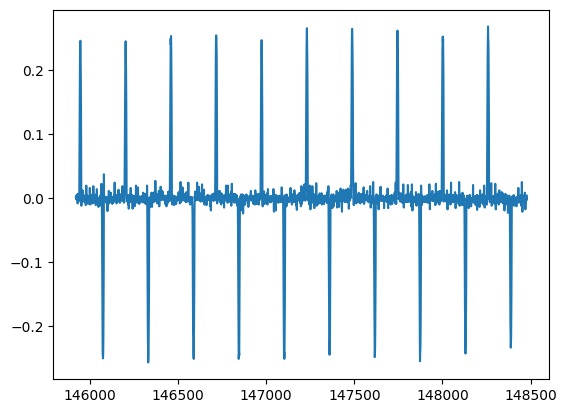

windows 58


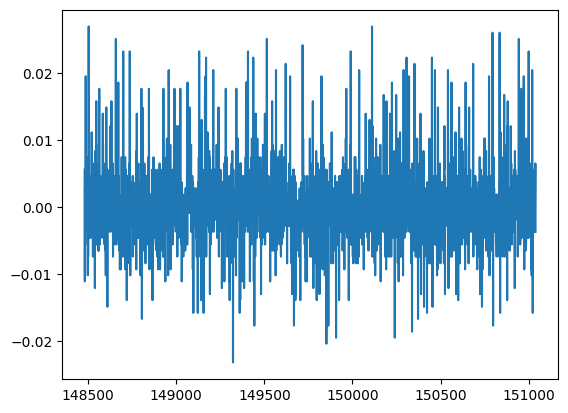

windows 59


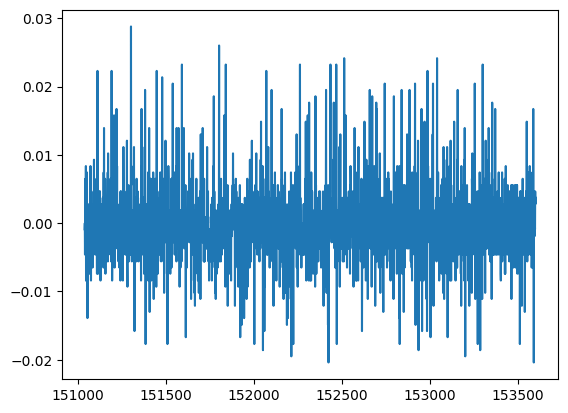

windows 60


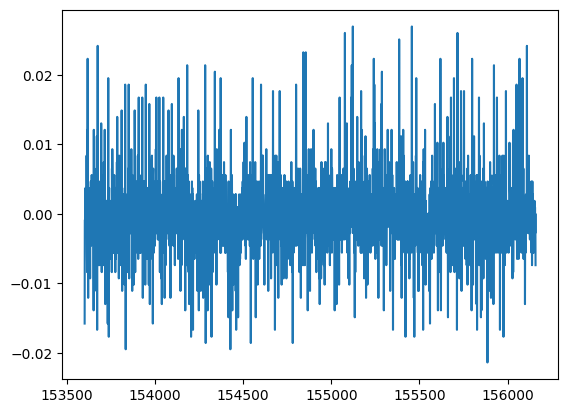

windows 61


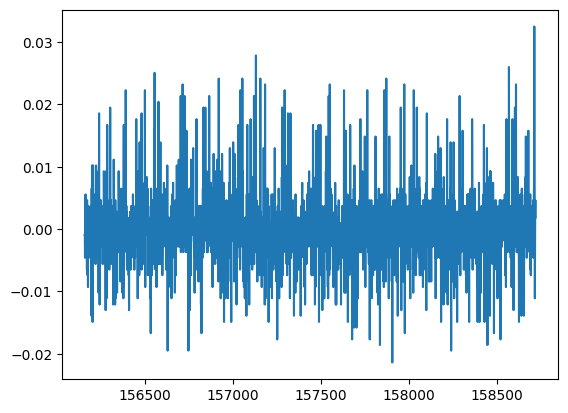

windows 62


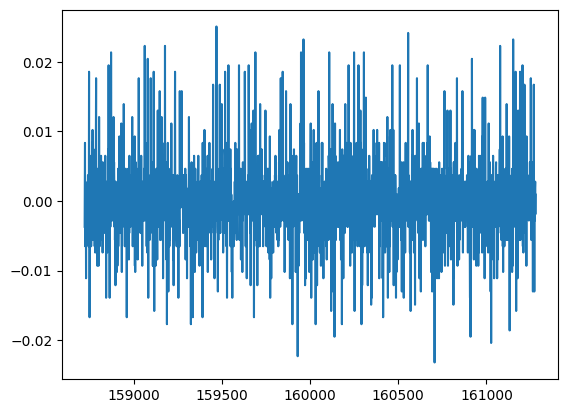

windows 63


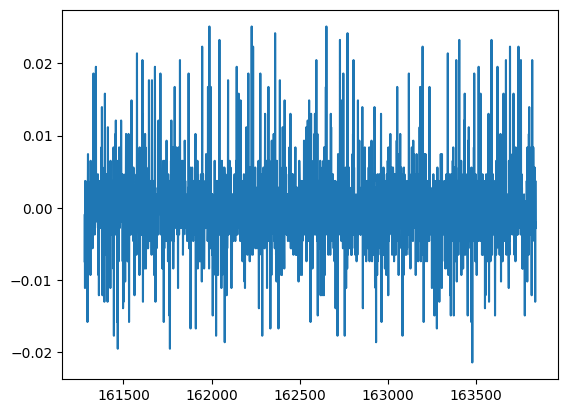

windows 64


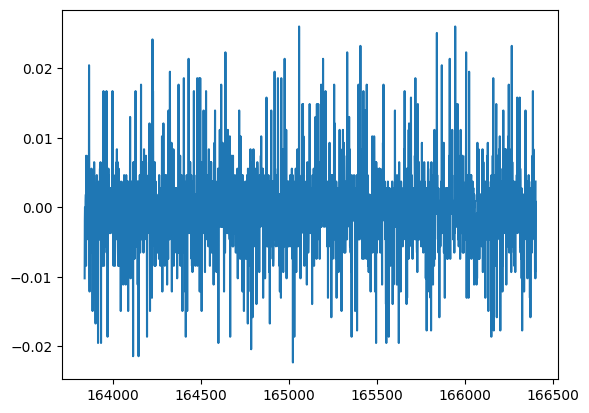

windows 65


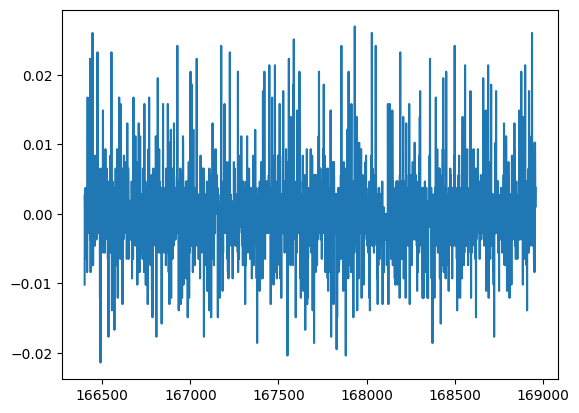

windows 66


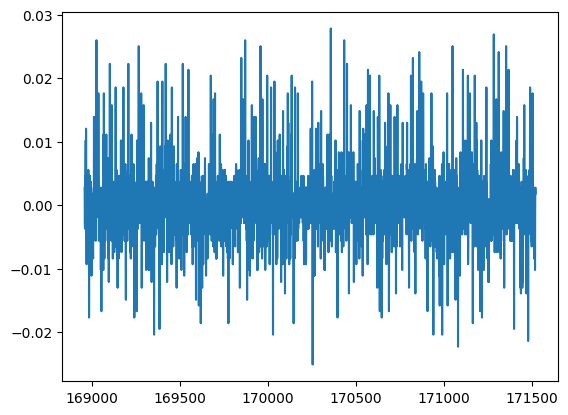

windows 67


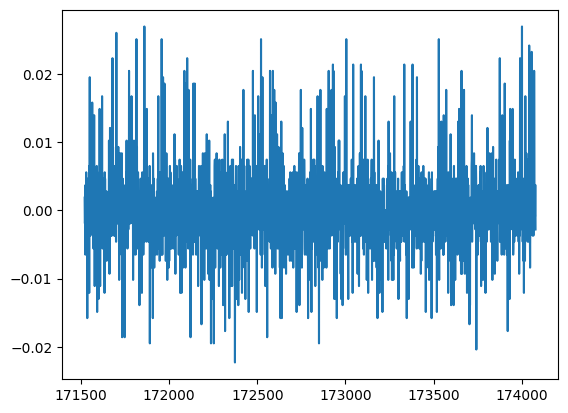

windows 68


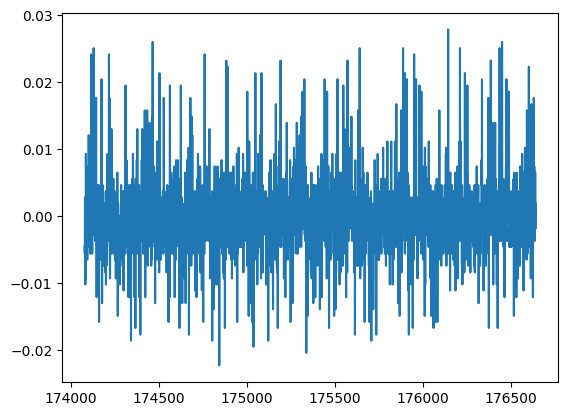

windows 69


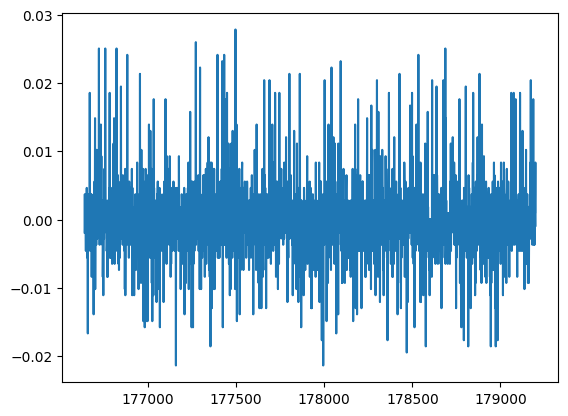

windows 70


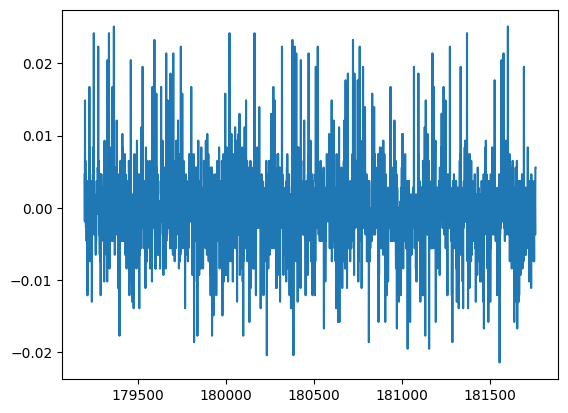

windows 71


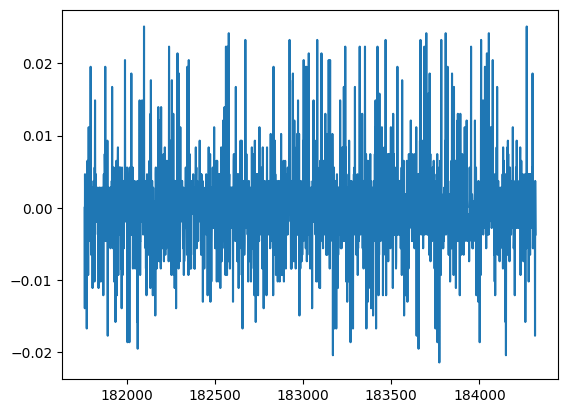

windows 72


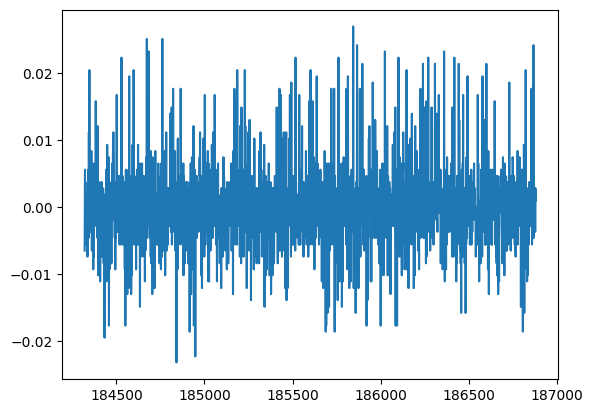

windows 73


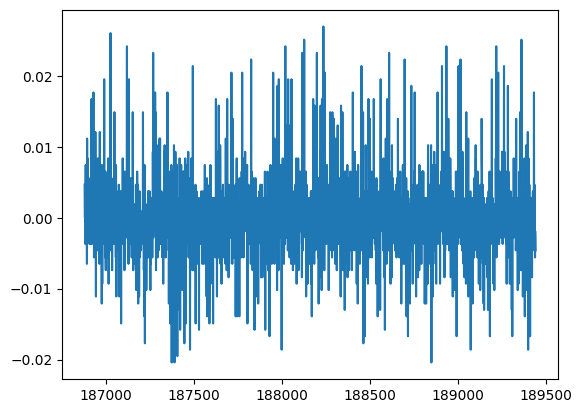

windows 74


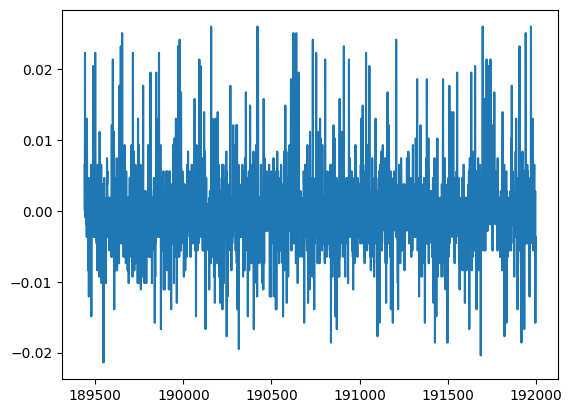

windows 75


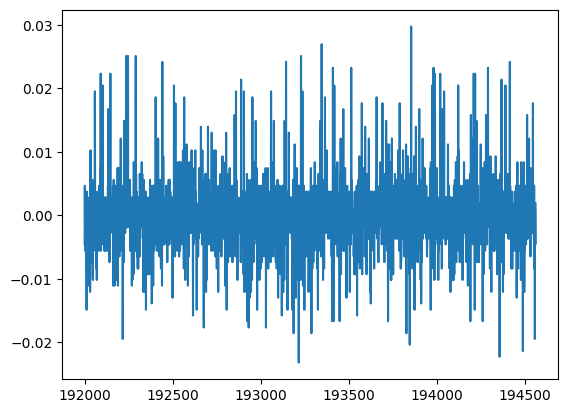

windows 76


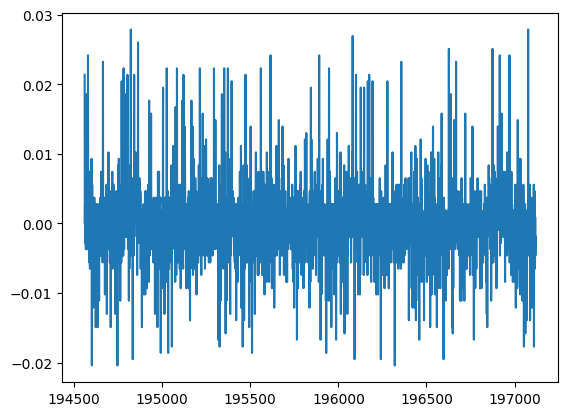

windows 77


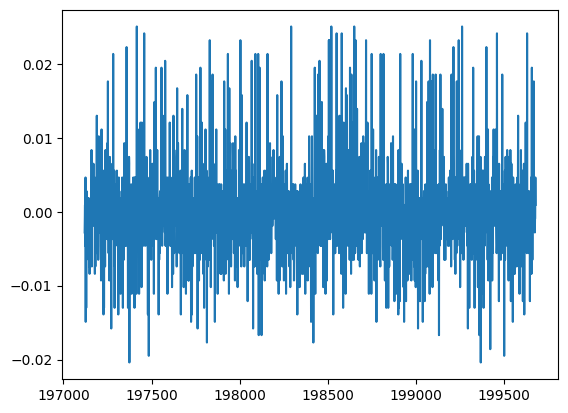

In [25]:
i=0
while i<len(windows_agregado_ad):
  plt.plot(windows_agregado_ad[i]['BIValor[Amperios]'])
  print('windows',i)
  plt.show()
  i=i+1

TV LED detection

Funcionamiento desde la 5 hasta la 54.

In [26]:
k=30  #hiperparámetro de cantidad de armónicos.
t=0 #hiperparámetro de la ventana de referencia de la agregada

In [27]:
U=np.array([H_C[55][0:k], H_D[40][0:k], H_B[10][0:k]])   #arranca de 1 porque saco la fundamental.

In [28]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

#v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3])

In [29]:
len(H_C)

78

<>:24: SyntaxWarning: invalid escape sequence '\i'
<>:24: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipython-input-2722851249.py:24: SyntaxWarning: invalid escape sequence '\i'
  plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')


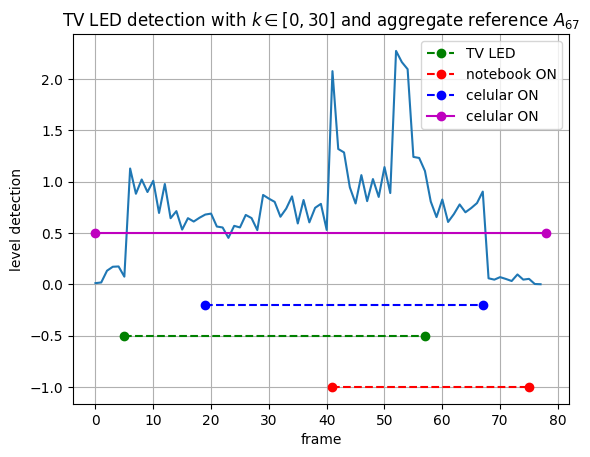

In [30]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))
  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))
#plt.title('Toaster detection with k=30')



plt.xlabel('frame', size=10)
plt.ylabel('level detection', size=10)

plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

plt.plot([5,57],[-0.5,-0.5],'o--g', label='TV LED')
plt.plot([41,75],[-1,-1],'o--r', label='notebook ON')
plt.plot([19,67],[-0.2,-0.2],'o--b', label='celular ON')

plt.plot([0,78],[0.5,0.5],'o-m', label='celular ON')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,76],[0,0],'--', label='inactive frame')

#plt.plot([0,76],[0.25,0.25],'--', label='inactive frame')

#plt.plot([0,77],[0,0],'--', label='low level')




plt.legend()
#plt.ylim(0,0.1)

plt.savefig('tv_detection_ds5')
#plt.ylim(0,0.1)
plt.show()

Base sobre el mismo canal.

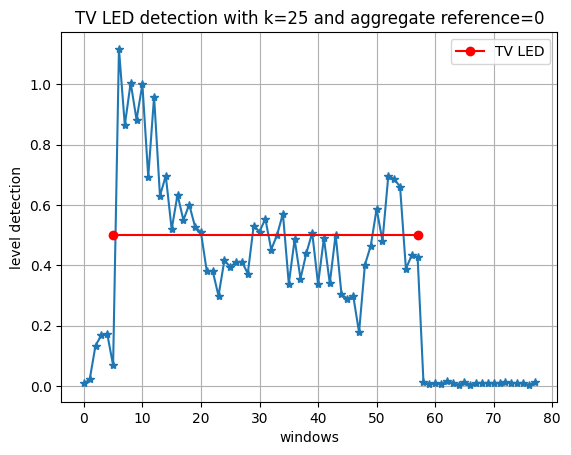

In [31]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_B[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))
  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1), marker='*')
#plt.title('Toaster detection with k=30')



plt.xlabel('windows', size=10)
plt.ylabel('level detection', size=10)

plt.title('TV LED detection with k=25 and aggregate reference=0')

plt.grid()

plt.plot([5,57],[0.5,0.5],'o-r', label='TV LED')

#plt.plot([0,77],[0,0],'--', label='low level')




plt.legend()
#plt.ylim(0,0.1)

#plt.savefig('notebook detection with k=25 and w0=0')
#plt.ylim(0,0.1)
plt.show()

estos resultados validan la base proyectada.

Detección ideal (proyección B en B)

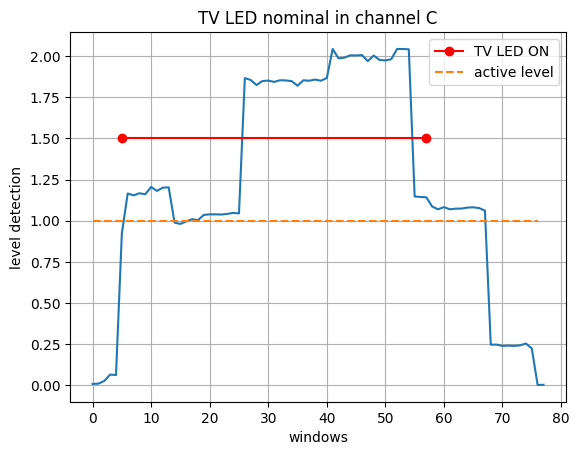

In [32]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_B[30][0:k], A)/(np.dot(H_B[30][0:k], H_B[30][0:k]))                          #para comparar con la ortonormalización.


  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('windows', size=10)
plt.ylabel('level detection', size=10)

plt.plot([5,57],[1.5,1.5],'o-r', label='TV LED ON')

plt.plot([0,76],[1,1],'--',label='active level')

#plt.ylim(0, 1.7)
plt.title('TV LED nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend()

#plt.ylim(0,1.7)

#plt.savefig('notebook_nominal_in_channel_C')

plt.show()

# channel C - Notebook detection

In [35]:
k=30  #hiperparámetro de cantidad de armónicos.
t=0 #hiperparámetro de la ventana de referencia de la agregada

In [36]:
U=np.array([H_B[30][0:k], H_D[40][0:k], H_C[40][0:k]])   #arranca de 1 porque saco la fundamental.

In [37]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

#v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3])

<>:24: SyntaxWarning: invalid escape sequence '\i'
<>:24: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipython-input-1835970758.py:24: SyntaxWarning: invalid escape sequence '\i'
  plt.title('notebook detection with $k \in [0,30]$ and aggregate reference $A_{14}$')


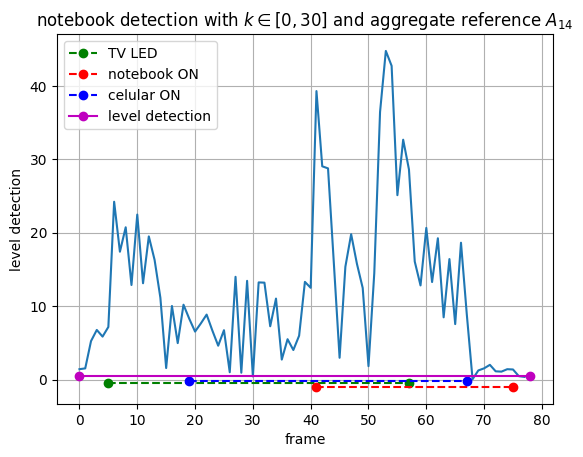

In [38]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))
  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))
#plt.title('Toaster detection with k=30')



plt.xlabel('frame', size=10)
plt.ylabel('level detection', size=10)

plt.title('notebook detection with $k \in [0,30]$ and aggregate reference $A_{14}$')

plt.grid()

#plt.plot([41,75],[0.5,0.5],'o-g', label='notebook ON')

#plt.plot([0,39],[0.5,0.5],'o-r', label='false active frame detection')

#plt.plot([0,76],[0,0],'--', label='inactive frame')

#plt.plot([0,76],[0.25,0.25],'--', label='inactive frame')

#plt.plot([0,77],[0,0],'--', label='low level')


plt.plot([5,57],[-0.5,-0.5],'o--g', label='TV LED')
plt.plot([41,75],[-1,-1],'o--r', label='notebook ON')
plt.plot([19,67],[-0.2,-0.2],'o--b', label='celular ON')

plt.plot([0,78],[0.5,0.5],'o-m', label='level detection')

plt.legend()
#plt.ylim(0,0.1)

plt.savefig('notebook detection_ds5_a14')
#plt.ylim(0,0.1)
plt.show()

Base sobre canal C

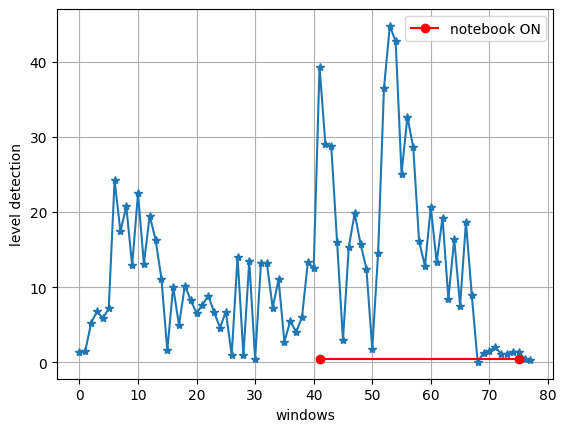

In [39]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))                          #para comparar con la ortonormalización.


  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1), marker='*')

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('windows', size=10)
plt.ylabel('level detection', size=10)

plt.plot([41,75],[0.5,0.5],'o-r', label='notebook ON')

#plt.ylim(0, 1.7)

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend()
#plt.ylim(0,0.2)
plt.show()

Nos da la idea de que la base funciona. El tema es que le cuesta identicar con la agregada que tiene señales parecidas




Caso ideal; C nominal en C

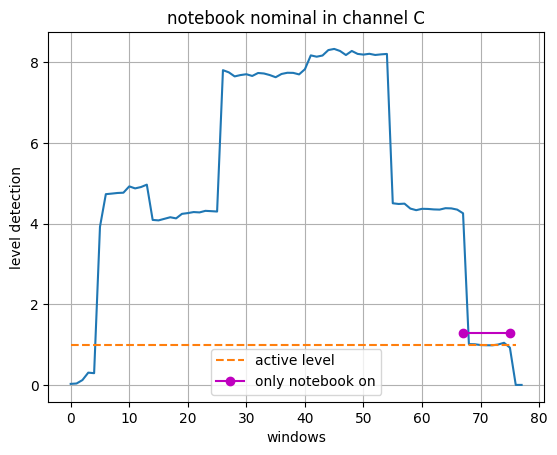

In [40]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][1:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_C[55][1:k], A)/(np.dot(H_C[55][1:k], H_C[55][1:k]))                          #para comparar con la ortonormalización.


  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('windows', size=10)
plt.ylabel('level detection', size=10)

#plt.plot([41,75],[1,1],'o-r', label='notebook ON')
#plt.plot([0,40],[0.4,0.4],'o-g', label='notebook OFF')

plt.plot([0,76],[1,1],'--', label='active level')


plt.plot([67,75],[1.3,1.3],'o-m', label='only notebook on')

#plt.ylim(0, 1.7)
plt.title('notebook nominal in channel C')

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend()

#plt.ylim(0,1.7)

plt.savefig('noebook ideal projection')

plt.show()

# Channel D: Celular

Funcionamiento desde la 19 hasta la 67,

Base en D

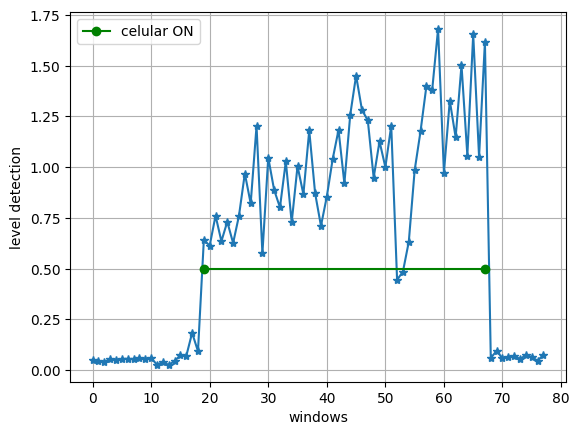

In [46]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_D[i]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))

  #x=np.dot(H_D[40], A)/(np.dot(H_D[40], H_D[40]))

  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1), marker='*')

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('windows', size=10)
plt.ylabel('level detection', size=10)

plt.plot([19,67],[0.5,0.5],'o-g', label='celular ON')

#plt.ylim(0, 1.7)

plt.grid()
#plt.ylim(0,1)
#plt.savefig('fridge detection with k=30')

plt.legend()

plt.show()

# Proyección directa (funcionamiento de todas las detecciones)

Caso ideal (usar esta proyección con la combinación de TV y cell o TV, cell y notebook)

combinando frames.

In [47]:
nominal_TV=H_B[30][0:10] #arranco en uno para prescindir del armónico fundamental.
nominal_cell=H_D[40][0:10]
nominal_notebook=H_C[55][0:10]


In [48]:
np_list1 = np.array(nominal_TV)# heladera nominal
np_list2 = np.array(nominal_cell)# tostadora nominal

tv_cell= np_list1 + np_list2
tv_cell=list(tv_cell)

In [49]:
np_list3=np.array(nominal_notebook)
tv_cell_notebook=tv_cell+np_list3

In [50]:
cell_notebook=np_list2+np_list3

In [51]:
tv_notebook=np_list1+np_list3

In [52]:
len(tv_cell)

10

Considerando 30 armónicos

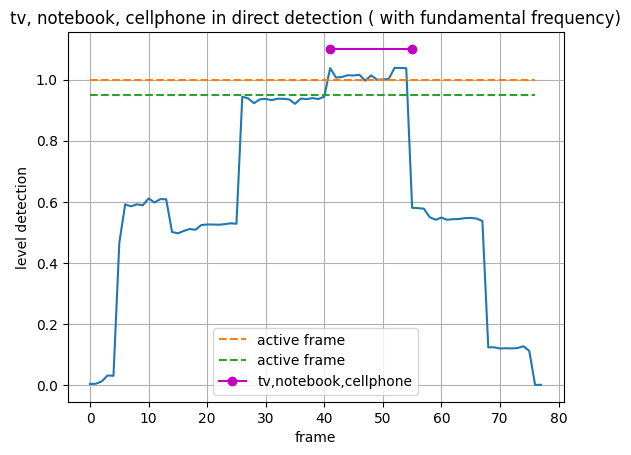

In [53]:
dot_A_referencia_1=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(H_A[50][0:10], A)/(np.dot(H_A[50][0:10], H_A[50][0:10]))                          #para comparar con la ortonormalización.


  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame', size=10)
plt.ylabel('level detection', size=10)

#plt.plot([19,67],[0.2,0.2],'o-g', label='celular ON')

plt.plot([0,76],[1,1],'--', label='active frame')

plt.plot([0,76],[0.95,0.95],'--', label='active frame')

plt.plot([41,55],[1.1,1.1],'o-m', label='tv,notebook,cellphone')

#plt.plot([0,76],[0.95,0.95],'--', label='active frame')

#plt.plot([67,75],[1.2,1.2],'o-m', label='only celular on')
#plt.ylim(0, 1.7)

plt.title('tv, notebook, cellphone in direct detection ( with fundamental frequency)')
plt.grid()
#plt.ylim(0,1)



plt.legend()

plt.savefig('tv,notebook,cellphone_direct_detection_fundamentalh')

plt.show()


In [54]:
print(dot_A_referencia_1[45])

1.0131866603918933


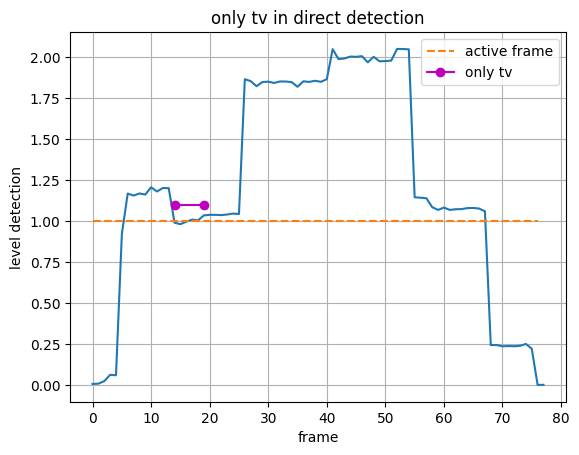

In [55]:
dot_A_referencia_11=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_TV, A)/(np.dot(nominal_TV, nominal_TV))                          #para comparar con la ortonormalización.
  #x= np.dot(nominal_TV, A)/(np.sqrt(np.dot(nominal_TV,nominal_TV))*np.sqrt(np.dot(A,A)))

  dot_A_referencia_11.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_11))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame', size=10)
plt.ylabel('level detection', size=10)

#plt.plot([19,67],[0.2,0.2],'o-g', label='celular ON')

plt.plot([0,76],[1,1],'--', label='active frame')

plt.plot([14,19],[1.1,1.1],'o-m', label='only tv')

#plt.plot([0,76],[0.95,0.95],'--', label='active frame')

#plt.plot([67,75],[1.2,1.2],'o-m', label='only celular on')
#plt.ylim(0, 1.7)

plt.title('only tv in direct detection')
plt.grid()
#plt.ylim(0,1)



plt.legend()

plt.savefig('only tv')

plt.show()

In [56]:
dot_A_referencia_1[28]

np.float64(0.922369483313392)

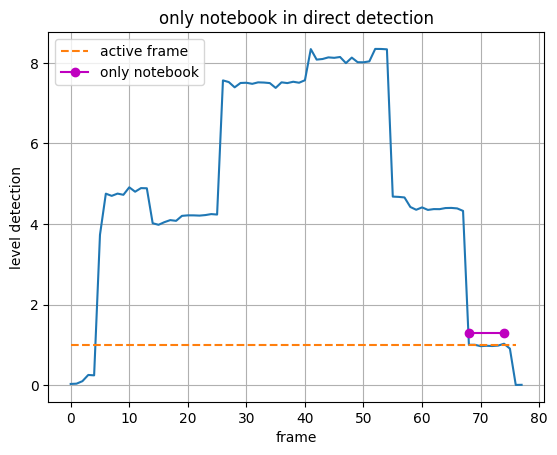

In [57]:
dot_A_referencia_111=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_notebook, A)/(np.dot(nominal_notebook, nominal_notebook))                          #para comparar con la ortonormalización.

  #x= np.dot(nominal_notebook, A)/(np.sqrt(np.dot(nominal_notebook,nominal_notebook))*np.sqrt(np.dot(A,A)))


  dot_A_referencia_111.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_111))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame', size=10)
plt.ylabel('level detection', size=10)

#plt.plot([19,67],[0.2,0.2],'o-g', label='celular ON')

plt.plot([0,76],[1,1],'--', label='active frame')

plt.plot([68,74],[1.3,1.3],'o-m', label='only notebook')

#plt.plot([0,76],[0.95,0.95],'--', label='active frame')

#plt.plot([67,75],[1.2,1.2],'o-m', label='only celular on')
#plt.ylim(0, 1.7)

plt.title('only notebook in direct detection')
plt.grid()
#plt.ylim(0,1)



plt.legend()

plt.savefig('only notebook')

plt.show()

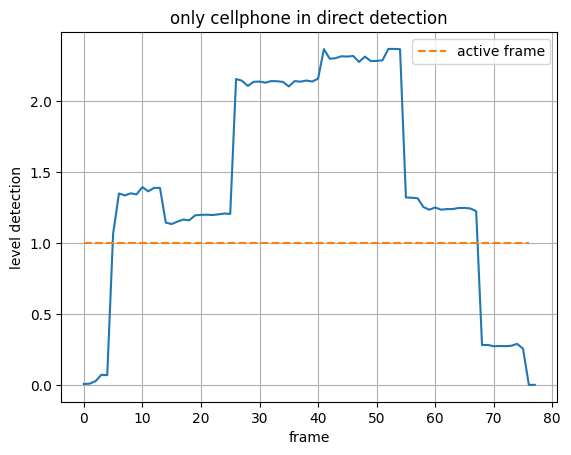

In [58]:
dot_A_referencia_1111=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(nominal_cell, A)/(np.dot(nominal_cell, nominal_cell))                          #para comparar con la ortonormalización.
  #x= np.dot(nominal_cell, A)/(np.sqrt(np.dot(nominal_cell,nominal_cell))*np.sqrt(np.dot(A,A)))

  dot_A_referencia_1111.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1111))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame', size=10)
plt.ylabel('level detection', size=10)

#plt.plot([19,67],[0.2,0.2],'o-g', label='celular ON')

plt.plot([0,76],[1,1],'--', label='active frame')

#plt.plot([14,19],[1.1,1.1],'o-m', label='only tv')

#plt.plot([0,76],[0.95,0.95],'--', label='active frame')

#plt.plot([67,75],[1.2,1.2],'o-m', label='only celular on')
#plt.ylim(0, 1.7)

plt.title('only cellphone in direct detection')
plt.grid()
#plt.ylim(0,1)



plt.legend()

plt.savefig('only cellphone')

plt.show()

In [59]:
dot_A_referencia_1[70]

np.float64(0.12044797805855184)

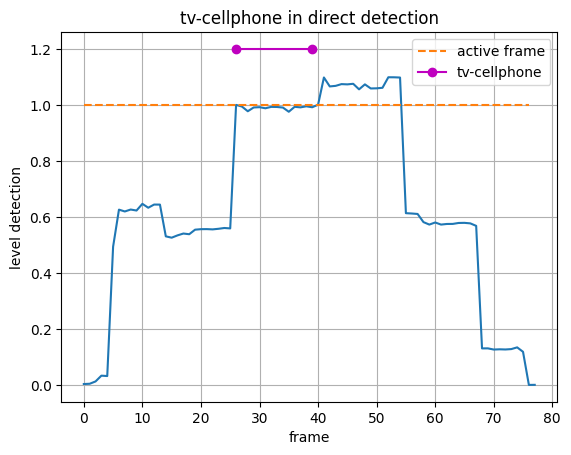

In [60]:
dot_A_referencia_11111=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(tv_cell, A)/(np.dot(tv_cell, tv_cell))                          #para comparar con la ortonormalización.


  dot_A_referencia_11111.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_11111))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame', size=10)
plt.ylabel('level detection', size=10)

#plt.plot([19,67],[0.2,0.2],'o-g', label='celular ON')

plt.plot([0,76],[1,1],'--', label='active frame')

plt.plot([26,39],[1.2,1.2],'o-m', label='tv-cellphone')

#plt.plot([0,76],[0.95,0.95],'--', label='active frame')

#plt.plot([67,75],[1.2,1.2],'o-m', label='only celular on')
#plt.ylim(0, 1.7)

plt.title('tv-cellphone in direct detection')
plt.grid()
#plt.ylim(0,1)



plt.legend()

plt.savefig('tv_cell')

plt.show()

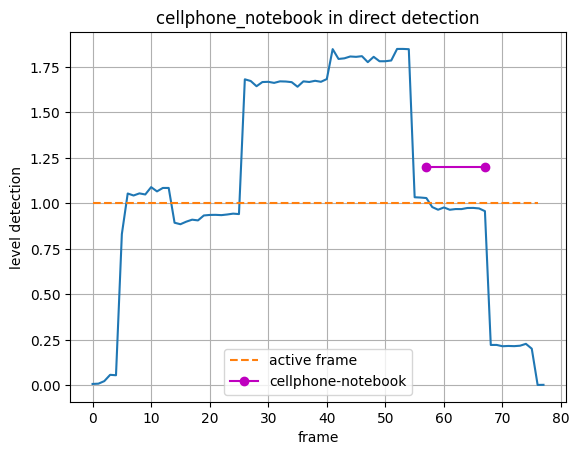

In [61]:
dot_A_referencia_111111=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(cell_notebook, A)/(np.dot(cell_notebook, cell_notebook))                          #para comparar con la ortonormalización.


  dot_A_referencia_111111.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_111111))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame', size=10)
plt.ylabel('level detection', size=10)

#plt.plot([19,67],[0.2,0.2],'o-g', label='celular ON')

plt.plot([0,76],[1,1],'--', label='active frame')

plt.plot([57,67],[1.2,1.2],'o-m', label='cellphone-notebook')

#plt.plot([0,76],[0.95,0.95],'--', label='active frame')

#plt.plot([67,75],[1.2,1.2],'o-m', label='only celular on')
#plt.ylim(0, 1.7)

plt.title('cellphone_notebook in direct detection')
plt.grid()
#plt.ylim(0,1)



plt.legend()

plt.savefig('cellphone_notebook')

plt.show()

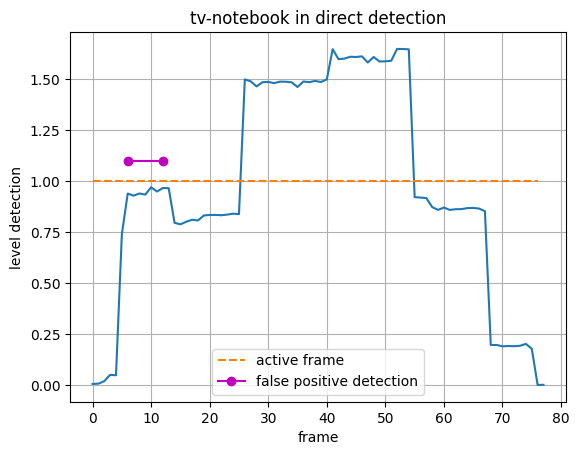

In [62]:
dot_A_referencia_1111111=[]
i=0
while i<len(windows_agregado_ad):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(tv_notebook, A)/(np.dot(tv_notebook, tv_notebook))                          #para comparar con la ortonormalización.


  dot_A_referencia_1111111.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1111111))

#plt.title('TV detection with k=30')

#plt.savefig('fridge_detection.png')

plt.xlabel('frame', size=10)
plt.ylabel('level detection', size=10)

#plt.plot([19,67],[0.2,0.2],'o-g', label='celular ON')

plt.plot([0,76],[1,1],'--', label='active frame')

#plt.plot([57,67],[1.2,1.2],'o-m', label='cellphone-notebook')

#plt.plot([0,76],[0.95,0.95],'--', label='active frame')

#plt.plot([67,75],[1.2,1.2],'o-m', label='only celular on')
#plt.ylim(0, 1.7)

plt.plot([6,12],[1.1,1.1],'o-m',label='false positive detection')

plt.title('tv-notebook in direct detection')
plt.grid()
#plt.ylim(0,1)



plt.legend()

plt.savefig('tv_notebook')

plt.show()


#es el mismo tramo que tv y cell.

# tv notebook nunca estuvieron solos.

In [63]:
dot_A_referencia_1[9]

np.float64(0.5886123408661483)

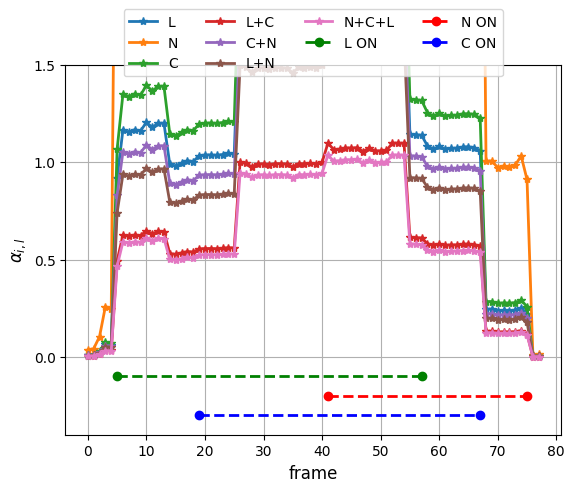

In [64]:

plt.plot(np.abs(dot_A_referencia_11), label='L', linewidth=2, marker='*')
plt.plot(np.abs(dot_A_referencia_111),label='N', linewidth=2, marker='*')
plt.plot(np.abs(dot_A_referencia_1111), label='C', linewidth=2, marker='*')
plt.plot(np.abs(dot_A_referencia_11111), label='L+C', linewidth=2, marker='*')

plt.plot(np.abs(dot_A_referencia_111111), label='C+N', linewidth=2, marker='*')
plt.plot(np.abs(dot_A_referencia_1111111), label='L+N', linewidth=2, marker='*')
plt.plot(np.abs(dot_A_referencia_1),label='N+C+L', linewidth=2, marker='*')

plt.plot([5,57],[-0.1,-0.1],'o--g', label='L ON', linewidth=2)
plt.plot([41,75],[-0.2,-0.2],'o--r', label='N ON', linewidth=2)
plt.plot([19,67],[-0.3,-0.3],'o--b', label='C ON', linewidth=2)

#plt.plot([1,80],[1,1],'o--m', label='detection')

plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([0.00, 0.50, 1.00, 1.50,2.00])

plt.ylim(-0.4,1.5)



plt.xlabel('frame', fontsize=12)
plt.ylabel(r'$\alpha_{i,l}$', fontsize=12)
plt.grid()

plt.savefig('alpha_tv_notebook_celu')

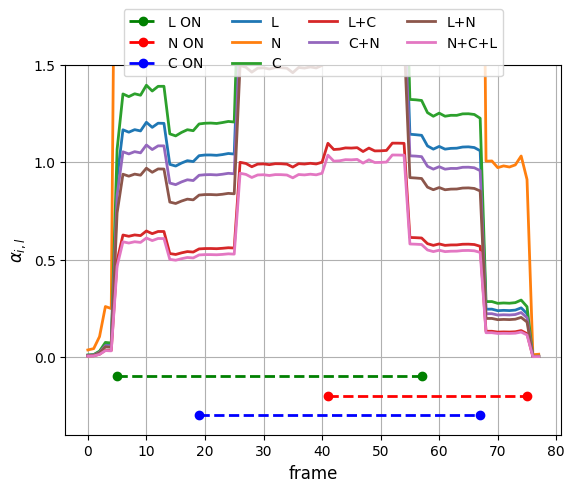

In [65]:
plt.plot([5,57],[-0.1,-0.1],'o--g', label='L ON', linewidth=2)
plt.plot([41,75],[-0.2,-0.2],'o--r', label='N ON', linewidth=2)
plt.plot([19,67],[-0.3,-0.3],'o--b', label='C ON', linewidth=2)


plt.plot(np.abs(dot_A_referencia_11), label='L', linewidth=2)
plt.plot(np.abs(dot_A_referencia_111),label='N', linewidth=2)
plt.plot(np.abs(dot_A_referencia_1111), label='C', linewidth=2)
plt.plot(np.abs(dot_A_referencia_11111), label='L+C', linewidth=2)

plt.plot(np.abs(dot_A_referencia_111111), label='C+N', linewidth=2)
plt.plot(np.abs(dot_A_referencia_1111111), label='L+N', linewidth=2)
plt.plot(np.abs(dot_A_referencia_1),label='N+C+L', linewidth=2)



#plt.plot([1,80],[1,1],'o--m', label='detection')

plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([0.00, 0.50, 1.00, 1.50,2.00])

plt.ylim(-0.4,1.5)



plt.xlabel('frame', fontsize=12)
plt.ylabel(r'$\alpha_{i,l}$', fontsize=12)
plt.grid()

plt.savefig('alpha_tv_notebook_celu')